In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Datasciences and AI booster 2.0</font>")

In [2]:
import mglearn

# <font color='blus'>What you will learn

> At the end of this course, you will learn :
> - Details about Ordinary Least Square regression
> - Linear models for regression
> - Linear models for classification 
> - What regularization means and the different ways to apply a regularization
> - What an objective function is
> - Naive Bayses algorithm


# <font color='blus'> Classification and regresssion

> As a reminder :
> - Given a dataset, a classification task aims to predict classes, such as colors, brand, any kind of qualifier that categorizes an observation.
> - Given a dataset, a regression task aims to predict a digit, a number such as a salary or a size.

# <font color='blus'> Vocabulary

> All the followings terms are equivalent and refer to `X`:
> - independant variable
> - feature
> - predictive variable
> - explanatory variable

> All the followings terms are equivalent and refer to `y`:
> - dependant variable
> - target
> - predicted variable
> - explained variable

# <font color='blus'>Linear models for Regression

## <font color='blus'>Ordinary Least Square Error

> Asumption : there is a **linear relation** between target, $y$ and input variables, say $X_0, X_1, ..,X_p$
>
> This relation, for any point, is expressed as : 
> - $Y = a_0\times X_O + a_1\times X_1 + ... + a_N\times X_N + \beta$
>
> This relationship is supposed to be true for any point.
>
> Ordinary least square algorithm will compute an approximation of coefficients $(a_0, a_1, ..., a_p, \beta)$ say $(\hat{a}_0, \hat{a}_1, ..., \hat{a}_p, \hat{\beta})$, and in turn, lead to an approximation of $Y$, say, $Y_{pred}$ :
>
> - $Y_{pred} = \hat{a}_0\times X_O + \hat{a}_1\times X_1 + ... + \hat{a}_N\times X_N + \hat{\beta}$
>
> This approximation leads to the error :
> - \$(Y_{pred} - Y)² =\epsilon^2$
>
> OLS principle consists in minimizing the sum of this square error that is represented as red squares in the figure below.
>> Red points are errors while blue points are the expected values.
>
> On the figure below, this lead to find line parameters for the line that **minimize** the errors areas that shapes the line drawn through all points.
>
> **Vocabulary** :
> - When dataset dimension is 1, the linear relationship is a line
> - When dataset dimension is 2, the linear relationship is a plan
> - When dataset dimension is above 2, the linear relationship is said an hyper-plan



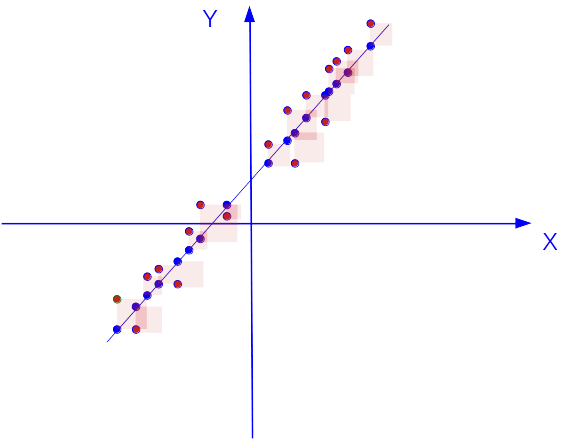

> When dataset dimension is 1, the this curve is a line with coefficients :
> - $\hat{a}_0$ that is the slope
> - $\hat{\beta}$ that is the intercept.
>
> There is an asumption behind this model :
> - for each point, prediction error follows a Gaussian distribution. 
>
>This mean, they are **no complex non linear** interactions that influence measurements in the dataset. All non mastered effects that interact with measured points are balancing each others and are centered around an average position.
>
> Intercept is the average value of the target when the explanotory variables are all zero, means if we take a specific case that $X$ has no influence over target $Y$.
> 
> Such interpretation for intercept may have **no sense** in some case.

### <font color='blus'>Wave dataset

> `mglearn` is a library of helper functions to build datasets. 

In [6]:
import mglearn
from sklearn.model_selection import train_test_split 

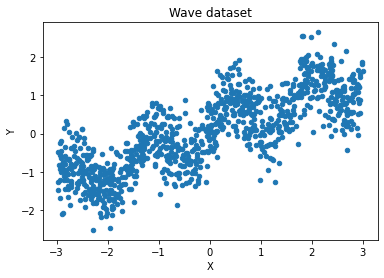

In [7]:
import pandas as pd

X, y = mglearn.datasets.make_wave(n_samples=1000)

df_plot = pd.DataFrame(data = {'X':X.ravel(), 'Y':y.ravel()})
ax=df_plot.plot(x='X', y='Y', kind='scatter')


_=ax.set_title("Wave dataset")


In [8]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = linear_model.LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('')
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.45219318]
lr.intercept_: 0.05180226211104758

Training score: 0.61
Test score: 0.64


> Let's plot the points issues from learned coefficients

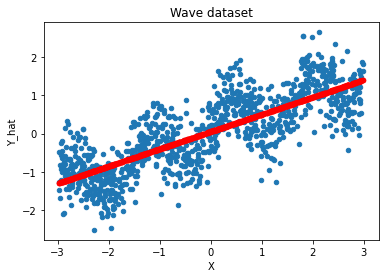

In [9]:
from sklearn import linear_model
import pandas as pd
y_hat = X*lr.coef_[0]+lr.intercept_
df_plot = pd.DataFrame(data = {'X':X.ravel(), 'Y':y.ravel()})
ax=df_plot.plot(x='X', y='Y', kind='scatter')

df_plot = pd.DataFrame(data = {'X':X.ravel(), 'Y_hat':y_hat.ravel()})
ax=df_plot.plot(x='X', y='Y_hat', kind='scatter', ax=ax, color='red')


_=ax.set_title("Wave dataset")


> Let's plot the dispersion of predictions.
>
> In the figure below, blle points are the one from the true dataset, the red one are issued from the prediction.
>
> Plot shows the dispersion of the predictions. 

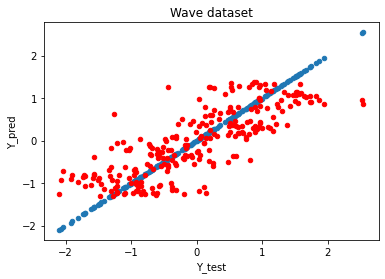

In [10]:
import pandas as pd
df_plot = pd.DataFrame(data = {'X_test':y_test.ravel(), 'Y_test':y_test.ravel()})
ax=df_plot.plot(x='X_test', y='Y_test', kind='scatter')
y_pred = lr.predict(X_test)
df_plot = pd.DataFrame(data = {'Y_test':y_test.ravel(), 'Y_pred':y_pred.ravel()})
ax=df_plot.plot(x='Y_test', y='Y_pred', kind='scatter', ax=ax, color='red')


_=ax.set_title("Wave dataset")

### Quizz

> Considering training score and test score, does this model underfit or overfit? 
>> Rep: 

> In term of complexity, what to conclude about this model ? 
>> Rep: 

> NB : *inside any `sklearn` instance, variables that ends with `_` such as `intercept_` are isseud from a training process*

## <font color='blus'>Ridge regression

### <font color='blus'>Boston extended dataset

> We're going to use the OLS linear regression on this dataset
>

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
import mglearn

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = linear_model.LinearRegression().fit(X_train, y_train)


print('')
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))


Training score: 0.95
Test score: 0.61


/Users/sugumaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

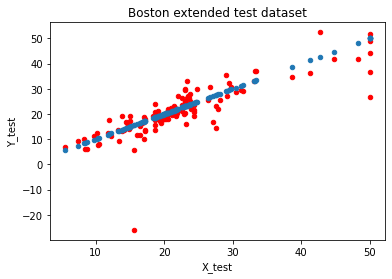

In [12]:
import pandas as pd
y_pred = lr.predict(X_test)
df_plot = pd.DataFrame(data = {'Y_test':y_test.ravel(), 'Y_pred':y_pred.ravel()})
ax=df_plot.plot(x='Y_test', y='Y_pred', kind='scatter', color='red')


df_plot = pd.DataFrame(data = {'X_test':y_test.ravel(), 'Y_test':y_test.ravel()})
ax=df_plot.plot(x='X_test', y='Y_test', kind='scatter', ax=ax)


_=ax.set_title("Boston extended test dataset")

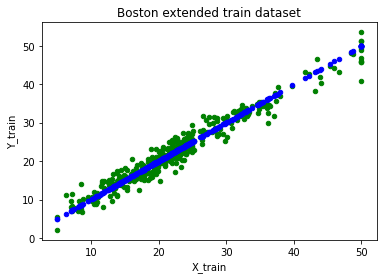

In [13]:
import pandas as pd
y_pred = lr.predict(X_train)
df_plot = pd.DataFrame(data = {'Y_train':y_train.ravel(), 'Y_pred':y_pred.ravel()})
ax=df_plot.plot(x='Y_train', y='Y_pred', kind='scatter', color='green')


df_plot = pd.DataFrame(data = {'X_train':y_train.ravel(), 'Y_train':y_train.ravel()})
ax=df_plot.plot(x='X_train', y='Y_train', kind='scatter', ax=ax, color='blue')


_=ax.set_title("Boston extended train dataset")

In [14]:
print(X.shape)

(506, 104)


> Note that considering the dimension of this dataset, 104, it is not relevant to display a scatter plot to get insights from data.
>
> In later lessons, we will see that it is possible to reduce the dataset dimension to plot points that still represent the model.

### Quizz

> Considering training score and test score, does this model underfit or overfit? 
>> Rep: 

> Ridge regression will help.
>
> Due to the fact there is a linear relationship between predicted variable and predictive variables, it is relevant to think that some coefficients have a great influence to predict values in direction of train target.
>
> In addition to the fact that coefficients are trained to get optimized square error, an additional constraint is applied on this coefficients for their magnitude to be **as small as possible**. 
>
> In some words, providing the best results with the smallest coefficients should lead to good scores with less overfitting.
>
> Ridge model will decrease influence of some coefficients avoiding so overfitting. This constraint is named **Regularization**.
>
> Regularization aims to decrease overfitting, then, having an algorithm with less variance and more bias.

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.89
Test score: 0.75


> `Ridge` training score is lowest then `LinearRegresion` while `Ridge` test score is better then `LinearRegresion`.
>
> Ridge regulatization can be tuned with $\alpha$ hyper parameter. By default, $\alpha$ value is fixed to 1.

In [16]:
from sklearn.linear_model import Ridge
#help(Ridge)

In [17]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.95
Test score: 0.60


>
> When $\alpha$ parameter is 0, then model behaves as `LinearRegression` model.
>
> When $\alpha$ parameter increases, then `Ridge` model becomes more and more biased, therefore simpliest in term of complexity, therefore, is unlikely to overfit.

In [15]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.7).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.90
Test score: 0.76


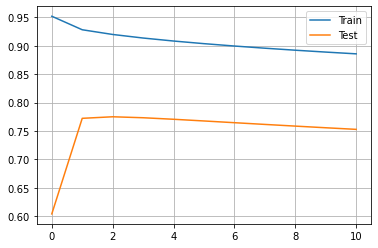

In [16]:
from sklearn import linear_model

list_score_train = list()
list_score_test  = list()
for alpha in range(0,11,1):
    alpha = alpha*0.1
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
    score_train = ridge.score(X_train, y_train)
    score_test  = ridge.score(X_test, y_test)
    list_score_train.append(score_train)
    list_score_test.append(score_test)

df_plot = pd.DataFrame(data=list_score_train
                       , columns=['Train'])
df_plot = pd.concat([df_plot, pd.DataFrame(data=list_score_test
                       , columns=['Test'])], axis=1)

ax =df_plot.plot(grid=True)

> What about coefficients ?
>
> Three models are trained with respective $\alpha$ values 0, 0.1 and 10. 

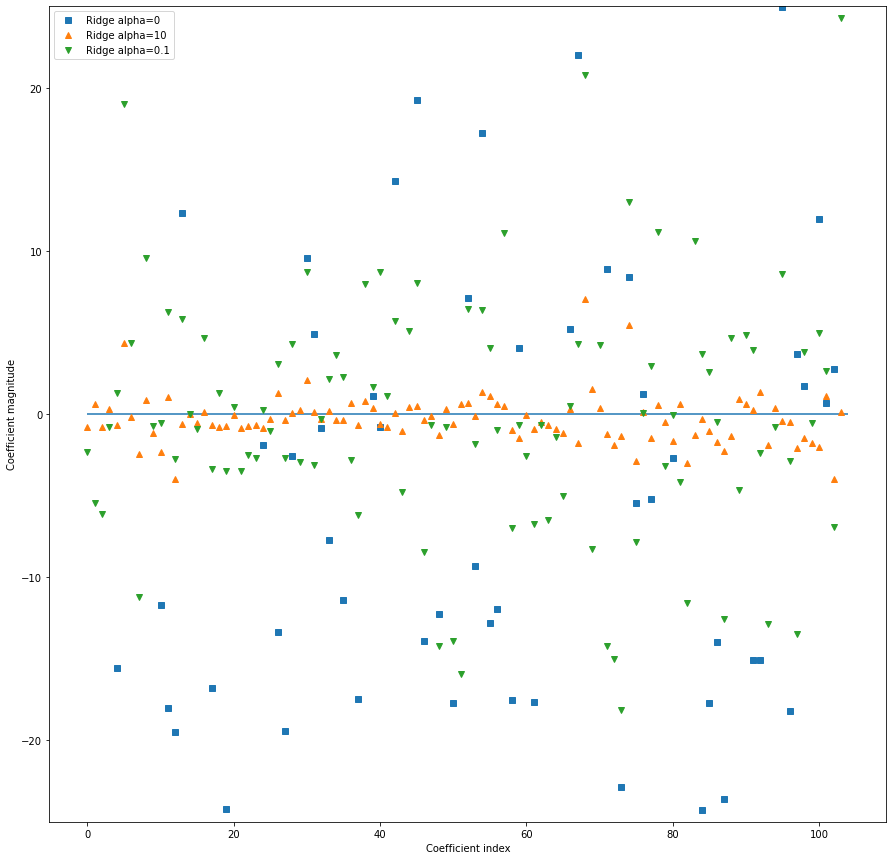

In [17]:
import matplotlib.pyplot as plt
from sklearn import linear_model

ridge00 = linear_model.Ridge(alpha=0).fit(X_train, y_train)
ridge01 = linear_model.Ridge(alpha=0.1).fit(X_train, y_train)
ridge10 = linear_model.Ridge(alpha=10).fit(X_train, y_train)

plt.subplots(figsize=(15, 15))

plt.plot(ridge00.coef_, 's', label="Ridge alpha=0")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
_=plt.legend()


### <font color='blus'>The learning curve

> For a given model with fixed hyper-parameters, the effect of dataset size over score is the learning curve.

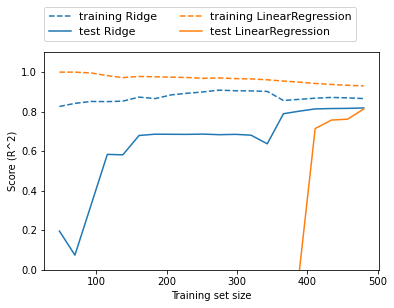

In [18]:
mglearn.plots.plot_ridge_n_samples()

> It can be seen that :
> - Training score is better then test score in any cases
> - Train score for Linear regression model is always better then Ridge one; Linear Regression model has more variance then Ridge one.
> - Linear regression model is not able to learn anything until training size becomes close to 400
> - Ridge model is more constrained (constraints apply on coefficients), then more biased then Linear Regression, then it generalizes better. 
> - When more and more data comes into dataset, then both model perform better. When more data comes, model becomes more and more complex. Therefore, `Ridge` regularization effect decreases because the need of decrease the influence of coefficients decreases along with the increase of dataset complexity. Linear Regression variance decreases also because the complexity of Linear Regresion is no more able to fit with complexity represented by dataset model.    

## <font color='blus'>Lasso regression

> `Lasso` is a linear regression model with a regularization that leads to  coefficients values to be close to zero.
> 
> With a such model, only significant features remain active for prediction. Model therefore becomes easy to **interpret**, mean, interpreting the role of each one of the coefficient that lead to prediction.

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.linear_model import Lasso
import numpy as np
import mglearn

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.7)

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.27
Test set score: 0.25
Number of features used: 3


> Lasso performs bad. 
>
> Lasso drasticaly droped most of the coefficients and uses only 3 coefficients. 
>
> It becames dramaticaly biaised therefore it underfits.
>
> `Lasso` also uses an hyperparameter, $\alpha$, that controls regularization intensity.
>
> The number of iterations allow to control the training intensity. Lasso is trained to reduce a cost function and this is achieved with multiple iterations.

In [20]:
lasso = Lasso(max_iter=10000, alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.88
Test set score: 0.83
Number of features used: 32


> The number of coefficients is now close to the previous training.
>
> This lead to increase Lasso score, with a moderate underfitting and a relative good generalization.

In [21]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=.1).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.92
Test score: 0.84


> Compared to the best score of `Ridge`, `Lasso` achieves a closed generalization score, **with a third of the coefficients only**. 

> While decreasing the regularization effect, the score becomes closest then the linear regression.
>
> Scores below show that model overfit with less generalization ability.

In [22]:
lasso = Lasso(max_iter=100000, alpha=0.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.93
Test set score: 0.79
Number of features used: 70


> What about Lasso coefficients?

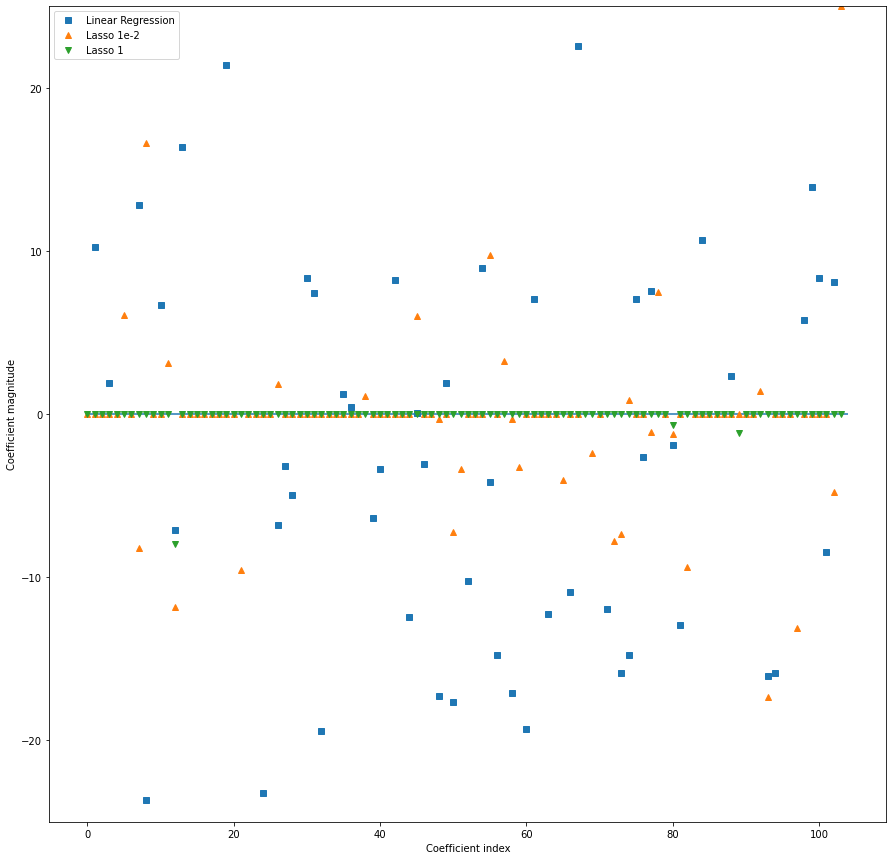

In [23]:
import matplotlib.pyplot as plt
from sklearn import linear_model

lr = linear_model.LinearRegression().fit(X_train, y_train)
lasso1em2 = linear_model.Lasso(alpha=1.e-2, max_iter=100000).fit(X_train, y_train)
lasso1 = linear_model.Lasso(alpha=1.).fit(X_train, y_train)

plt.subplots(figsize=(15, 15))

plt.plot(lr.coef_, 's', label="Linear Regression")
plt.plot(lasso1em2.coef_, '^', label="Lasso 1e-2")
plt.plot(lasso1.coef_, 'v', label="Lasso 1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
_=plt.legend()

## <font color='blus'>Conclusion

> All these models `LinearRegression`, `Lasso` and `Ridge` are built with the same hypothesis, claiming that there is a linear relationship between features and target.
>
> This hypothesis is transcripted in the mathematical formula :
> - $Y = a_0\times X_O + a_1\times X_1 + ... + a_N\times X_N + \beta$
>
> Linear model learns an approximation of this formula leading to a new formula :
>
> - $Y_{pred} = \hat{a}_0\times X_O + \hat{a}_1\times X_1 + ... + \hat{a}_N\times X_N + \hat{\beta}$
>
> The way algorithms learn approximation of coefficients and intercept $(\hat{a}_0, ..., \hat{a}_N, \hat{\beta})$ depends of the constraints that are applied to them.
> - For the `LinearRegression` model, no constraints are applied to coefficients, this result in a straightforward computation to find coefficients.
> - For the `Ridge` and `Lasso` models, mathematical model to approximate coefficients is much more complex, said, *optimization under constraints* model. In such cases,  learning process consists in iterativaly to decrease a function named an **objective function**.
>
> All these models, because they are built on the same asumption, reach, under some circumptances, nearly same results.
>
> Practically, `Ridge` or `Lasso` models will be used for production, `LinearRegression` will be used for benchmarking. Lasso may be preferred when model interpretation is a key Key Indicator. This is then a matter of business decision rather then pure scoring, for decision support cases, for example.

# <font color='blus'>Linear models for Classification

## <font color='blus'>Case of binary classification

> This classification model family is also based on the hypothesis of the existence of a linear relationship between features and target.
>
> Due to the nature of the task, classification, the mathematical formula changes to take into account the fact that predicted target is no more a **continuous** value, but rather, a **categorial** value.
>
> Binary classification dispatchs results in two categories, positive category and negative category. 
>
> In the mathematical model, positive category is represented by value $1$ while negative category is represented by value $-1$. 
>
> This is what the corresponding mathematical formula for binary classification expresses :
> - $ Y= a_0\times X_O + a_1\times X_1 + ... + a_N\times X_N + \beta > 0$ for positive category
> - $ Y= a_0\times X_O + a_1\times X_1 + ... + a_N\times X_N + \beta < 0$ for negative category
>
> The points $(X_0,...,X_N)$ satisfying $Y=0$ are located on the **decision boundary**. Depending the datamodel dimension (the number of features), this boundary may be a line, a plan or an hyper-plan.
>
> As for linear regression models, linear classification models also do use regularization such as Ridge and Lasso to avoid overfitting. Hyperparameters controlling the overfitting are same as for linear regression models.

> Quiz : suppose blue line below is the decision boundary line for points in the dataset below. Is the classification task linearly separable or not?

> 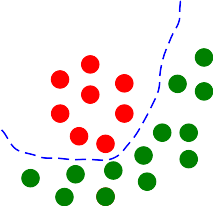

> Rep : It is linearly separable even if decision boundary is not a straight-line in a plan. **Linearity is about coefficients**, not features.
>
> Think to this linear expression : 
> - $y = a_1\times X + a_2\times X^2 +...+ a_N\times X^N$
> - Decision boundary expressed with $a_1\times X + a_2\times X^2 +...+ a_N\times X^N= 0$ will not be an straigh-tline.

## <font color='blus'>Logistic regression and Support Vector Classification

> This name, logistic regression, may be confusing, but logistic regression is a **classification** algorithm.
>
> Logistic term comes from the name of the function used to classify positive points from negative one. 

> 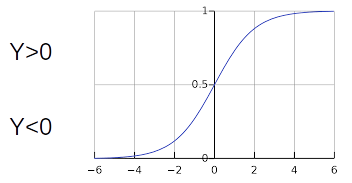

>
> In `sklearn` package, it is implemented into `LogisiticRegression` class.
>
> **Support Vector Classification** (SVC) is another linear classification algorithm that differs from logistic regression is the way coefficients and intercepts are computed to approximate linear relationship between features and target.

>
> In `sklearn` package, Support Vector Classification is implemented into `LinearSVC` class.

>
> The followings figures show how these algorithm do classify two categories of points, blue and red.
>
> Decision boundary has been also drawn.

/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


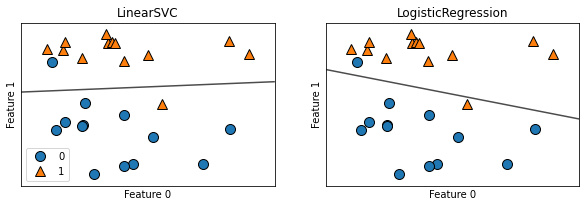

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
list_cls_model = [LinearSVC(max_iter=100000), LogisticRegression(max_iter=100000)]

for cls_model, ax in zip(list_cls_model, axes):
    clf = cls_model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

> While `LogisticRegression` separate categrories with a line, `SVC` builts a margin between the two categories with the constraint that this margin is as large of possible.
>
> Decision boundary is interpreted as following:
> - Points that are below black line are classified in category 0
> - Points that are above black line are classified in category 1
>
> Both of these algorithms have 2 missclassified points.

> 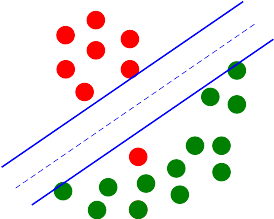

## <font color='blus'>Effects of regularization on classification

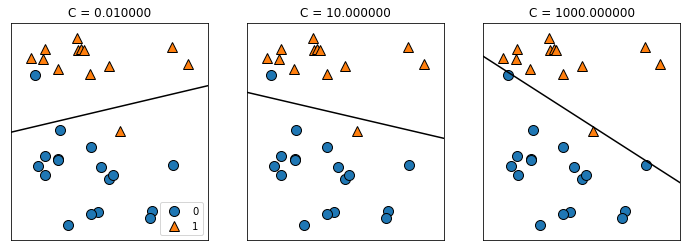

In [25]:
mglearn.plots.plot_linear_svc_regularization()

> Regularization coefficient is $C=\frac{1}{\alpha}$; greater this coefficient is, less the regularization is then more variance will be catched by algorithm.
>
> The boundary decision pivots to reach the extreme position on the third display, where only one point is now miss classified.
> 
> This third position is extreme in the sense there is no way to classify correctly all points with a straight line.

## <font color='blus'>Breast cancer dataset

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## <font color='blus'>Logistic regression with default regularization parameter

In [10]:
logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, cancer.data, cancer.target)
print("Cross-validation scores= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores= [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Average cross-validation score= 0.9507995652848935


Cross-validation scores= [0.96341463 0.90243902 0.95061728 0.98765432 0.95061728 0.9382716
 0.97530864]
Average cross-validation score= 0.9526175420484363


> The model underfit, due to the test score close to the train score.

## <font color='blus'>Logistic regression with low regularization

> Increasing C parameter will lead to allow more complexity in the model, therefore, catching more information from dataset.

In [28]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=50000, C=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.986
Test set score: 0.979


> This last result confirms assertion of complexity issued from results with $C=1$

## <font color='blus'>Logistic regression with a range of parameters for Ridge

> The next cell displays the coefficient magnitude for different values of C.
>
> Note that the symbol `T` in expression `logreg.coef_.T` stands for a transposition.
>

> Roughly said, a transposition flips rows as columns, as shown below

In [29]:
arr = np.array([[i for i in range(10)]])
display(arr)
display(arr.T)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

logreg0.01 : Training set score: 0.953
logreg0.01 : Test set score: 0.951

logreg1.0 : Training set score: 0.958
logreg1.0 : Test set score: 0.958

logreg10000 : Training set score: 0.986
logreg10000 : Test set score: 0.979



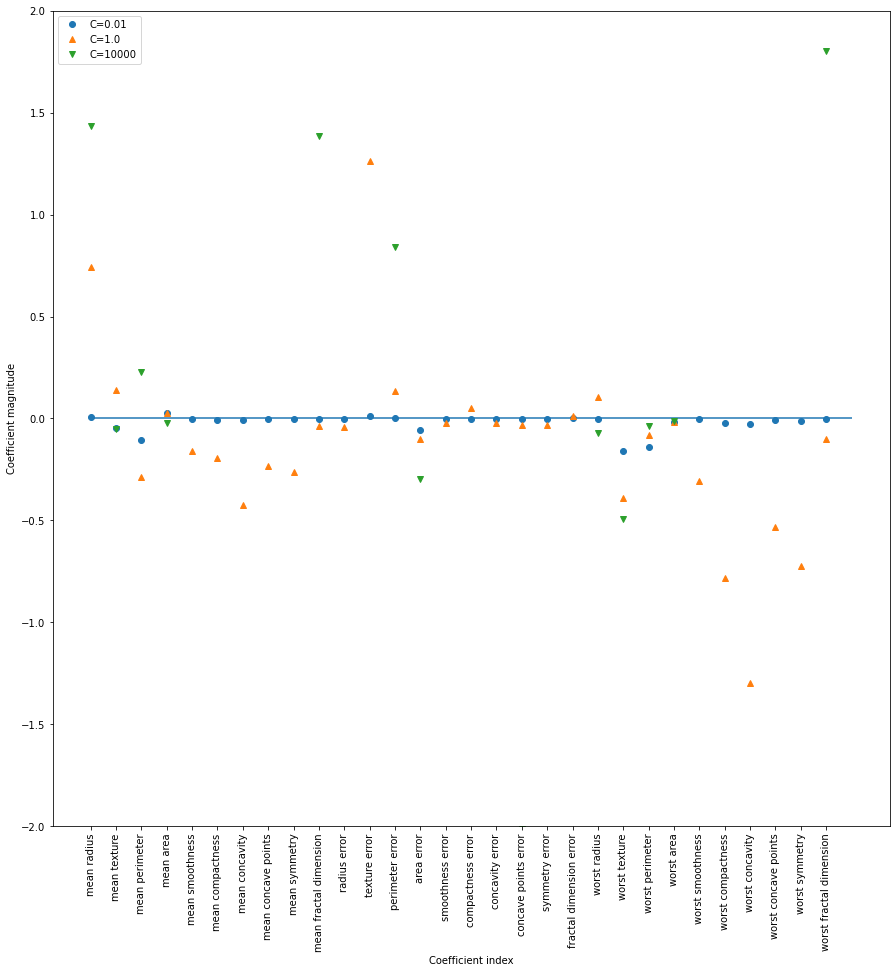

In [30]:
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

plt.subplots(figsize=(15, 15))

# zip allow to extract couple of values from both, list of C values and list of markers.
for C, marker in zip([0.01, 1., 10000], ['o','^','v']) :
    logreg  = LogisticRegression(max_iter=10000, C=C, penalty="l2").fit(X_train, y_train)

    print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
    print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
    print()

    plt.plot(logreg.coef_.T, marker, label="C="+str(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
_=plt.legend()

## <font color='blus'>Logistic regression with a range of parameters for Lasso

logreg0.01 : Training set score: 0.918
logreg0.01 : Test set score: 0.930

logreg1.0 : Training set score: 0.960
logreg1.0 : Test set score: 0.958

logreg1000 : Training set score: 1.000
logreg1000 : Test set score: 0.944



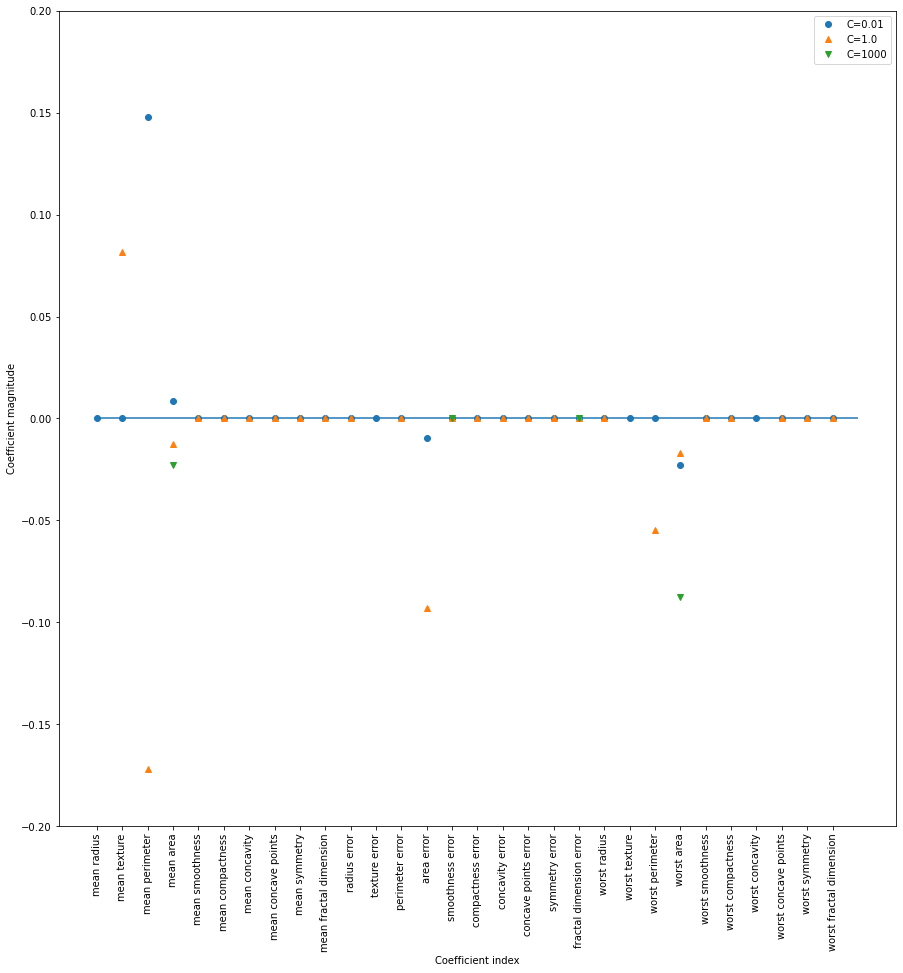

In [31]:
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)


plt.subplots(figsize=(15, 15))
for C, marker in zip([0.01, 1., 1000], ['o','^','v']) :
    logreg  = LogisticRegression(max_iter=5000
                                 , C=C
                                 , penalty="l1"
                                 , solver='liblinear'
                                ).fit(X_train, y_train)

    print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
    print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
    print()

    plt.plot(logreg.coef_.T, marker, label="C="+str(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-0.2, 0.2)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
_=plt.legend()

# <font color='blus'>Linear models for multi-class classification

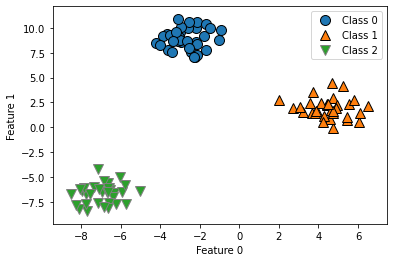

In [32]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
pd.Series(data=y).value_counts()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
_=plt.legend(["Class 0", "Class 1", "Class 2"])

In [33]:
X.shape

(100, 2)

In [34]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


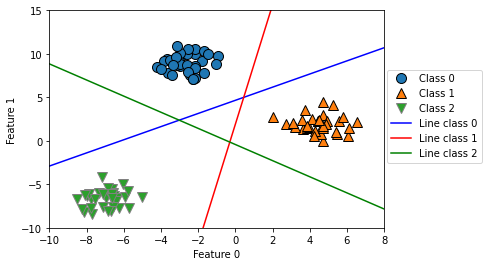

In [35]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
    'Line class 2'], loc=(1.01, 0.3))

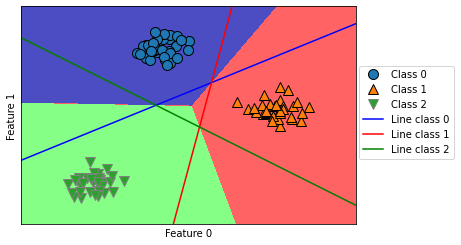

In [36]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
    'Line class 2'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

# <font color='blus'>Naive Bayse

> Naive Bayse algorithm consists in computing an a-posteriori knowlege thanks to a **prior knowledge**.

## <font color='blus'>Prior knowledge

> **Prior knowledge** is something what we know as True from a dataset. Studying Naive Bayse algorithm, prior knowledge is a *known* probability.
>> E.g in french population, the propability a human being is a female is $0.5$.
>
> If we want to classify a french person as male or female, say, in either class $f$ or $m$, for this, considering hair length, then the prior knowledge is the $P(f)=0.5$. This is a binary classification task.

## <font color='blus'>Binary classification with Naive Bayse algorithm

### <font color='blus'>Classification with 1 feature

#### <font color='blus'>The dataset

> 
> Let's say that we get a dataset with 1000 persons with:
> - a single feature, that is hair length, $L$ 
> - a target, sex, with two values, $f$ for female and $m$ for male.
>

#### <font color='blus'>The classification task

> 
> Classification tasks consists in predict the sex of a person, given its hair length, $L$.
>

#### <font color='blus'>The Naive Bayse theorem

> The **Naive Bayse theorem** can be use for a such classification task.
>
> Naive Bayse theorem is expressed with the formula :
> - $P(f|L) = \frac{P(L|f)\times P(f)}{P(L)}$
>> - $P(f)$ is the prior knowledge, $0.5$
>> - $P(L)$ is the probability of having hair for in given length
>> - $P(L|f)$ is the conditional probability, given a female, having hairs of size length $L$
>
> Given a person with length $L$ for hairs, the maximum value for $P(f|L)$ will allow to classify this person as a female or, as a male.
>
> The values $P(f)$ and $P(L)$ are constants. 
>
> $P(f)$ and $P(L|f)$ can be calculated with formula:
>> - $P(f) = \frac{count(f)}{count(m)+count(f)}$ where $\begin{cases} count(m) \mathrm{\ is\ the\ number\ of\ male}\\ count(f) \mathrm{\ is\ the\ number\ of\ female} \end{cases}$
>>
>>
>> - $P(L|f) = \frac{count(L\mathrm{\ given}\ f)}{count(f)}$ where $\begin{cases} count(L\mathrm{\ given}\ f) \mathrm{\ given\ }\ f\mathrm{,number\ of\ L}\\ count(f) \mathrm{\ is\ the\ number\ of\ female} \end{cases}$
>
> Then the maximum value for $P(f|L)$ is the maximum value of $P(L|f) \times P(f)$ .
>
>> And $P(L|f)\times P(f)$ is computed with the training dataset.

> 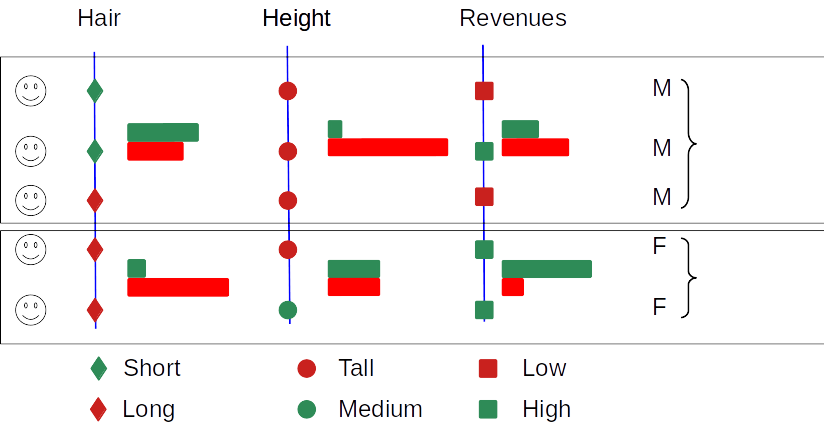

#### <font color='blus'>Predictions

> During training step, both of these quantities are computed:
>- $P(L|f) \times P(f)$
>- $P(L|m) \times P(m)$
>
> Then, given L, the maximum of these 2 quantities will deliver the follwing result :
>- $P(L|f) \times P(f) > P(L|m) \times P(m) \implies$ **predict(p,L) = f**
>
>- $P(L|m) \times P(m) > P(L|f) \times P(f) \implies$ **predict(m,L) = m**

### <font color='blus'>Binary classification with multiple features

> If features are expressed as $(d_1, ..., d_N)$ then Bayse theorem is then expressed with formula:
>
> - $P(f| d_1, ..., d_N) = \frac{P(d_1, ..., d_N|f)\times P(f)}{P(d_1, ..., d_N)}$
>
> And searching max for $P(f| d_1, ..., d_N)$ is the same then searching maximum value for $P(d_1, ..., d_N|f)\times P(f)$
> 
> Then the naive hypothesis claims:
>> $P(d_1, ..., d_N|f) \cong P(d_1|f) \times ... \times P(d_N|f)\times P(f)$
>
> This is equivalent to claim that $d_1,...,d_N$ features are all **independant** from each others. 
>
> In real life, this is rarely theh case! And this is why **naive** term takes place.
>
> Each of the terms $P(d_i|f)$ are conditionals probabilities.
>
>> Suppose that $d_i$ represents the `Revenues` feature and $f$ the `female` target. For example, $d_i$ may be represented with the range of  `High`, `Low` values.
>>
>> Then, a conditional probability can be expressed by a sentance such as **Given a High revenue, what is the 
> probability this Revenue to be earned by female ?**
>>
>>
>> The Bayse theorem leads to say, the maximum value for this conditional probability is also the maximum value
> for this conditional probability expressed by the sentance  **Given a female, this is the probability this female earn a high Revenue weighted by the probability this person to be a female** 
>>
>> And that's fine! Because given a training dataset, this is exactly what **Naive Bayse** algorithm learns!

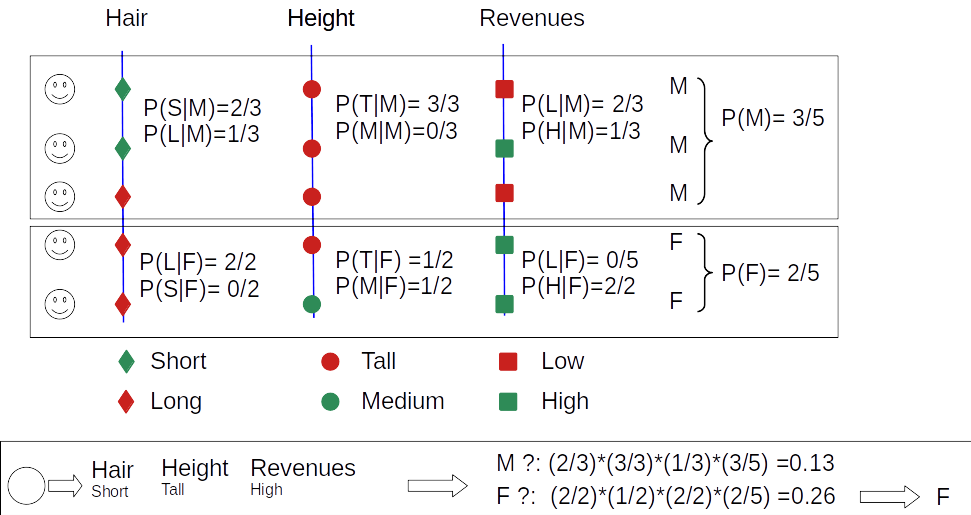

## <font color='blus'> Naive Bayse

### <font color='blus'>Drawing a dataset for Naive Bayse

In [37]:
dict_weather = {'weather':['sunny','rainy','sunny','sunny','sunny','rainy','rainy', 'sunny','sunny','rainy']}
df_weather = pd.DataFrame(dict_weather)

dict_car = {'car':['working','broken','working','working'\
                   ,'working','broken','broken', 'working','broken','broken']}
df_car     = pd.DataFrame(dict_car)

dict_target = {'target':['out','out','out','out','out','home','home','home','home','home']}
df_target   = pd.DataFrame(dict_target)

df = pd.concat([df_weather,df_car, df_target], axis=1)
df

,weather,car,target
0,sunny,working,out
1,rainy,broken,out
2,sunny,working,out
3,sunny,working,out
4,sunny,working,out
5,rainy,broken,home
6,rainy,broken,home
7,sunny,working,home
8,sunny,broken,home
9,rainy,broken,home


In [38]:
target_out = 'out'
target_home = 'home'

df_out  = df[df['target']==target_out]
df_home = df[df['target']==target_home]

> P(target_out) and P(target_home)

In [39]:
dict_target_val_prob = dict()
count_out  = len(df_out)
count_home = len(df_home)
p_out  = count_out/(count_out+count_home)
p_home = count_home/(count_out+count_home)
print("P({})= {}".format(target_out, p_out))
print("P({})= {}".format(target_home, p_home))
dict_target_val_prob['home'] = p_home
dict_target_val_prob['out'] = p_out


P(out)= 0.5
P(home)= 0.5


> Conditional probability related to `weather`

In [40]:
feature_i = 'weather'
df[feature_i].unique()

array(['sunny', 'rainy'], dtype=object)

> - Conditionnal probability related to `sunny` having `out`

In [41]:
# Calculate p(feature_i|out)
val_feature_i = 'sunny'

p_i_class = len(df_out[df_out[feature_i]==val_feature_i])/len(df_out)
print("P({}|{})= {}".format(val_feature_i, target_out, p_i_class))

P(sunny|out)= 0.8


In [42]:
df[feature_i].unique()

array(['sunny', 'rainy'], dtype=object)

> - Conditionnal probability related to `rainy` having `out`

In [43]:
# Calculate p(feature_i|out)
val_feature_i = 'rainy'

p_i_class = len(df_out[df_out[feature_i]==val_feature_i])/len(df_out)
print("P({}|{})= {}".format(val_feature_i, target_out, p_i_class))

P(rainy|out)= 0.2


> Conditional probability related to `car`
> - for doing so, all cells related to `weather` are compounded

In [44]:
feature_i = 'car'
for val_feature_i in df[feature_i].unique():

    # Calculate p(feature_i|out)
    p_i_class = len(df_out[df_out[feature_i]==val_feature_i])/len(df_out)
    print("P({}|{})= {}".format(val_feature_i, target_out, p_i_class))

P(working|out)= 0.8
P(broken|out)= 0.2


> Conditional probability related to all features having out:
> - P(feature_i|out)

In [45]:
for feature_i in df.columns[:-1]:
    for val_feature_i in df[feature_i].unique():

        # Calculate p(feature_i|out)
        p_i_class = len(df_out[df_out[feature_i]==val_feature_i])/len(df_out)
        print("P({}|{})= {}".format(val_feature_i, target_out, p_i_class))

P(sunny|out)= 0.8
P(rainy|out)= 0.2
P(working|out)= 0.8
P(broken|out)= 0.2


> Conditional probability related to all features having out and stored in a dictionary:
> - P(feature_i|out)
> - dict_feature={val_feature_i: prob}

In [46]:
dict_feature_i_prob = dict()
for feature_i in df.columns[:-1]:
    dict_val_feature_i_prob = dict()
    for val_feature_i in df[feature_i].unique():
        # Calculate p(feature_i|out)
        prob = len(df_out[df_out[feature_i]==val_feature_i])/len(df_out)
        print("P({}|{})= {}".format(val_feature_i, target_out, p_i_class))
        dict_val_feature_i_prob[val_feature_i] = prob
    dict_feature_i_prob[feature_i] = dict_val_feature_i_prob
display(dict_feature_i_prob)

P(sunny|out)= 0.2
P(rainy|out)= 0.2
P(working|out)= 0.2
P(broken|out)= 0.2


{'weather': {'sunny': 0.8, 'rainy': 0.2},
 'car': {'working': 0.8, 'broken': 0.2}}

> Conditional probability related to all features having out or home and stored in a dictionary:
> - P(feature_i|out)
> - dict_feature={val_feature_i: prob}

In [47]:
dict_target_feature_i_prob = dict()
for target_j in df['target'].unique() :
    df_target = df[df['target']==target_j]
    dict_feature_i_prob = dict()
    for feature_i in df.columns[:-1]:
        dict_val_feature_i_prob = dict()
        for val_feature_i in df[feature_i].unique():
            # Calculate p(feature_i|out)
            prob = len(df_target[df_target[feature_i]==val_feature_i])/len(df_target)
            #print("P({}|{})= {}".format(val_feature_i, target_j, prob))
            dict_val_feature_i_prob[val_feature_i] = prob
        dict_feature_i_prob[feature_i] = dict_val_feature_i_prob
    dict_target_feature_i_prob[target_j] = dict_feature_i_prob
display(dict_target_feature_i_prob)

{'out': {'weather': {'sunny': 0.8, 'rainy': 0.2},
  'car': {'working': 0.8, 'broken': 0.2}},
 'home': {'weather': {'sunny': 0.4, 'rainy': 0.6},
  'car': {'working': 0.2, 'broken': 0.8}}}

> Making predictions
>
> $P(d_1, ..., d_N|f) \cong P(d_1|f) \times ... \times P(d_N|f)\times P(f)$

In [48]:
X1, X2, true = df.sample().values[0][:-1][0],df.sample().values[0][:-1][1],df.sample().values[0][-1]
print("X=({},{}) True= {}".format(X1, X2, true))

X=(rainy,broken) True= home


> - P(out|X)

In [49]:
dict_pred = dict()

In [50]:
p_X1_out = dict_target_feature_i_prob[target_out]['weather'][X1]
p_X2_out = dict_target_feature_i_prob[target_out]['car'][X2]
p_X_out = p_X1_out*p_X2_out*p_out
print("P(out|X) = {}".format(p_X_out))
dict_pred[target_out] = p_X_out

P(out|X) = 0.020000000000000004


> - P(home|X)

In [51]:
p_X1_home = dict_target_feature_i_prob[target_home]['weather'][X1]
p_X2_home = dict_target_feature_i_prob[target_home]['car'][X2]
p_X_home = p_X1_home*p_X2_home*p_home
print("P(home|X) = {}".format(p_X_home))
dict_pred[target_home] = p_X_home

P(home|X) = 0.24


In [52]:
dict_pred

{'out': 0.020000000000000004, 'home': 0.24}

In [53]:
df_pred = pd.DataFrame(dict_pred.values(), index=dict_pred.keys(), columns=['Pred'])
pred = df_pred['Pred'].sort_values(ascending=False).index[0]

print(pred,df_pred.loc[pred])

home Pred    0.24
Name: home, dtype: float64


In [54]:
print("X=({},{}) Prediction= {} True={}".format(X1,X2,pred, true))

X=(rainy,broken) Prediction= home True=home


> Making predictions : compounding
>
> $P(d_1, ..., d_N|f) \cong P(d_1|f) \times ... \times P(d_N|f)\times P(f)$

In [55]:
def naivebayses_pred(arr_X):
    '''Apply Naive Bayse algorithm to predict values from an input.
    INPUT:
        * arr_X : array containing all features values
    OUTPUT
        * prediction for input values
    '''
    dict_pred = dict()
    target = df.columns[-1]
    for target_val in df[target].unique() :
        # Initialize the product of conditional probabilities for a given target value
        p_X_target_val = dict_target_val_prob[target_val]
        for x, feature in zip(arr_X,df.columns[:-1]) :
            p_X_target_val *= dict_target_feature_i_prob[target_val][feature][x]
        dict_pred[target_val] = p_X_target_val
    
    # Convert dictionary as a dataframe
    df_pred = pd.DataFrame(dict_pred.values(), index=dict_pred.keys(), columns=['Pred'])
    
    # Dataframe is sorted in reverse order; 
    # first value from sorted dataframe is the max probabilities.
    return df_pred['Pred'].sort_values(ascending=False).index[0]

In [56]:
arr_X, true = df.sample().values[0][:-1],df.sample().values[0][-1]
pred = naivebayses_pred(arr_X)
print("X=({},{}) Pred={} True= {}".format(X1, X2, pred, true))

X=(rainy,broken) Pred=home True= home


In [57]:
from termcolor import colored

df_pred = pd.DataFrame(columns=['Pred'])
i=0
for arr_X in df.values:
    pred = naivebayses_pred(arr_X[:-1])
    df_pred.loc[i] = pred
    i+=1
    if pred != arr_X[-1] :
        print(colored("X=({}) Pred={} True= {}".format(arr_X[:-1], pred, arr_X[-1]), 'red'))
    else: 
        print(colored("X=({}) Pred={} True= {}".format(arr_X[:-1], pred, arr_X[-1]), 'blue'))
        

X=(['sunny' 'working']) Pred=out True= out
X=(['rainy' 'broken']) Pred=home True= out
X=(['sunny' 'working']) Pred=out True= out
X=(['sunny' 'working']) Pred=out True= out
X=(['sunny' 'working']) Pred=out True= out
X=(['rainy' 'broken']) Pred=home True= home
X=(['rainy' 'broken']) Pred=home True= home
X=(['sunny' 'working']) Pred=out True= home
X=(['sunny' 'broken']) Pred=home True= home
X=(['rainy' 'broken']) Pred=home True= home


In [58]:
df_score = df_pred['Pred']==df['target']
print("Score= {}%".format(10*df_score.value_counts().values[0]))

Score= 80%


## <font color='blus'>Gaussian Naive Bayse

> Height, Hair and Revenue are supposed to be now continuous variables. 
>
> For an exemple, for Hair, rather then having values such as short or long, that are qualitative variables, lenght for hair values are now supposed to be 0.15, 0.25, 0.5...
> 
> Gaussian Naive Bayse algorithm takes place in such circumtances. 
>
> Because features are represented as continuous quantities, conditional probabioities for such features are now calculated thanks to **Probability Density Function (PDF)**.
>
> In the case of binary classification, target is either 0 or 1. Then prior knowledge, is caculated with target values occurencies.

> Gaussian PDF is required to calculate conditional probabilities :
>> - $P(Y|X_1,X2) \equiv P(X_1,X_2|Y) \times P(Y)$ where $X_1$ and $X_2$ are **continuous variables**
>>
>> and
>>
>> - $P(X_1,X_2|Y_0) \equiv P(X_1|Y_0) \times P(X_2|Y_0)\times P(Y_0)$ with $\begin{cases}P(X_1|Y_0) = pdf(X_1|Y_0)\\ P(X_2|Y_0)= pdf(X_2|Y_0)\end{cases}$
>>
>>
>> - $P(X_1,X_2|Y_1) \equiv P(X_1|Y_1) \times P(X_2|Y_1)\times P(Y_1)$ with $\begin{cases}P(X_1|Y_1) = pdf(X_1|Y_1)\\ P(X_2|Y_1)= pdf(X_2|Y_1)\end{cases}$
>>
>>
>> - $P(Y_0) = \frac{count(Y_0)}{count(Y_0)+count(Y_1)}$ ; $P(Y_1) = \frac{count(Y_1)}{count(Y_0)+count(Y_1)}$  
>
> **Prediction**
>> Given a point $(X_1, X2)$:
>> - Calculation of: $MAX(P(X_1,X_2|Y_0), P(X_1,X_2|Y_1))$

> On the figure below, conditional probabilities for feature belonging to { Hair, Height and Revenue}, all given Male and Females, are represented as distributions colored in red for P(feature|M) and blue for P(feature|Female).

>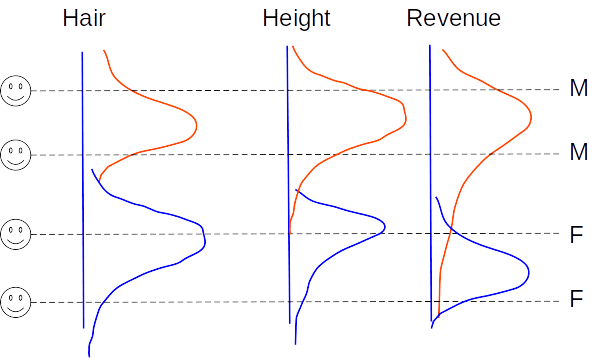

> Algorithm learn these conditionals probabilities. Then Naive Bayse theorem is used to calculate $P(Y|X)$ where $Y$ is the target and $X$ the features.

#### <font color='blus'> Gaussian Probability Density Function

> $PDF(x,\mu, std) = \frac{1.}{std \times  \sqrt{2\times \pi}}\times 
e^{\frac{-(x-\mu)^2}{2\times std^2}}$

### <font color='blus'>Drawing a dataset

> Let's consider a dataset with 2 features `X1` and `X2` that is binary labeled with `0` and `1`.
>
> `X1` and `X2` are continuous values and are contrived as Gaussians distributions.
>
> Such dataset complies with Gaussian Naive Bayse assumptions.

#### <font color='blus'> Building dataset

> To build a dataset with two separared groups we use 2 random normal distributions with same standard deviation 
>
> and different $\mu$ values.
>
> Predicted value, `y`, is assigned respectively to `1.` for the first group and `0.` for the second group.
>
> Pandas dataframes `df_y1` and `df_y2` are built then concatenated into `df_X` as an unique dataset.

In [18]:
mu=0.
sigma=1.
X1 = np.random.normal(mu, sigma, 50)
X2 = np.random.normal(mu, sigma, 50)
df_y1 = pd.DataFrame(data=np.array([X1, X2]).T, columns=['X1','X2'])
df_y1['y'] = 1.

mu=5.
sigma=1.
X1 = np.random.normal(mu, sigma, 50)
X2 = np.random.normal(mu, sigma, 50)

df_y2 = pd.DataFrame(data=np.array([X1, X2]).T, columns=['X1','X2'])
df_y2['y'] = 0.

df_X= pd.concat([df_y1, df_y2], axis=0, ignore_index=True)

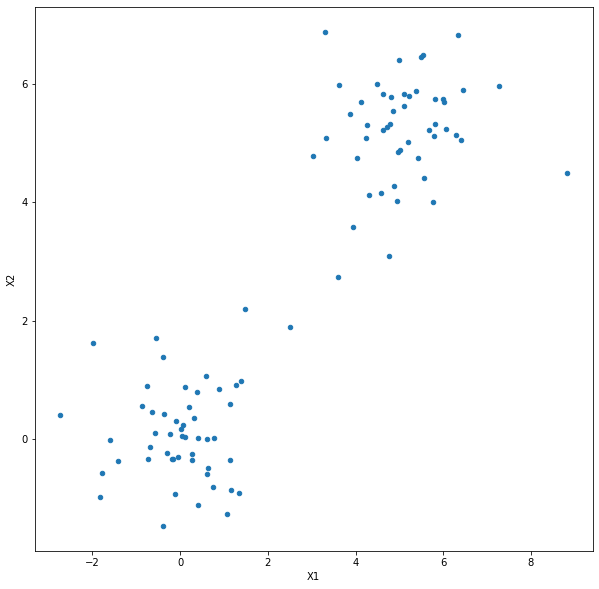

In [19]:
ax=df_X.plot(x='X1', y='X2', kind='scatter', figsize=(10,10))

> Groups are displayed, red for those points with `y=0.`, blue for others points.

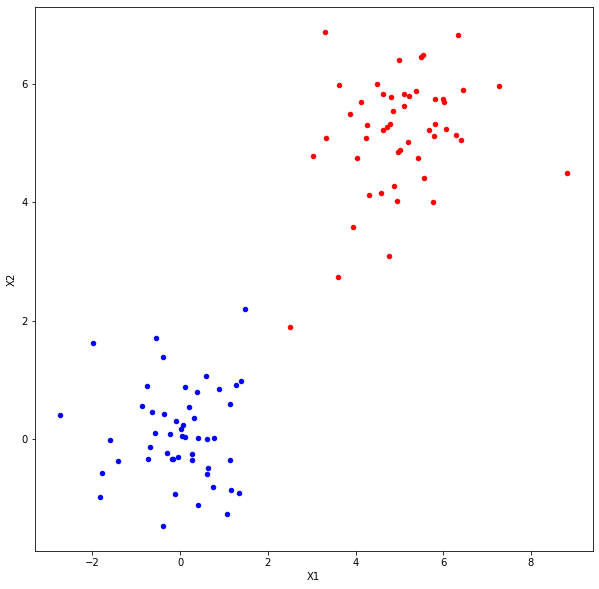

In [20]:
ax=df_X[df_X['y']==0].plot(x='X1', y='X2', kind='scatter', color='red', figsize=(10,10))
ax=df_X[df_X['y']==1].plot(x='X1', y='X2', kind='scatter', color='blue', ax= ax)

### <font color='blus'>Gaussian Naive Bayse algorithm

> The `pdf_function` function is the probability density function, used for continuous values.

> $PDF(x,\mu, std) = \frac{1.}{std \times  \sqrt{2\times \pi}}\times 
e^{\frac{-(x-\mu)^2}{2\times std^2}}$

In [21]:
import numpy as np

def pdf_function(x, mu, std):
    pdf = np.exp((-(x-mu)**2)/(2*std**2))
    pdf = pdf/(std*np.sqrt(2*np.pi))
    return pdf
    

> Following allows to check this fuction is able to contrive a Gaussian distribution.
>
> It is displayed with **mean=1** ($\mu=1$) and **standard deviation=1**

(50,)

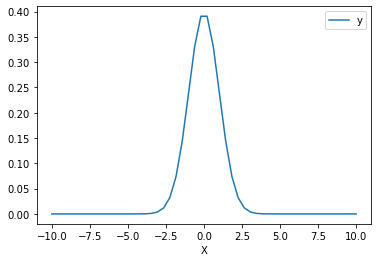

In [22]:
import numpy as np

# linspace returns 50 (default value) evenly spaces samples from a range of values.
X1  = np.linspace(-10,10)
display(X1.shape)
mu  = 0.
std = 1.
list_y = list()
for x in X1:
    y = pdf_function(x, mu, std)
    list_y.append(y)

df_plot = pd.DataFrame(data=np.array([X1, list_y]).T, columns=['X','y'])
ax=df_plot.plot(x='X', y='y', kind='line')

#### <font color='blus'> Gaussian Naive Bayse Implementation

> 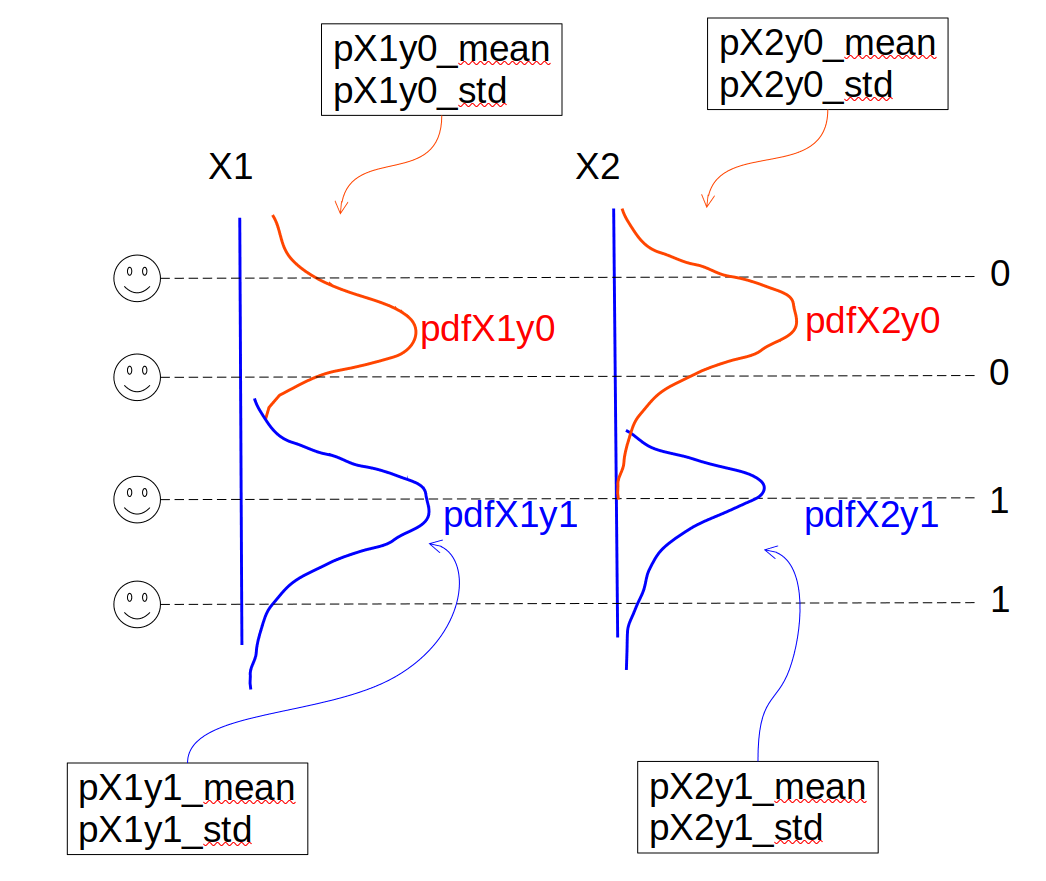

> Calculation of $\mu$ and $std$

In [23]:
pX1y0_mean = df_X['X1'][df_X['y']==0].mean()
pX1y0_std  = df_X['X1'][df_X['y']==0].std()
print('X1|y0:', pX1y0_mean, pX1y0_std)

pX1y1_mean = df_X['X1'][df_X['y']==1].mean()
pX1y1_std  = df_X['X1'][df_X['y']==1].std()
print('X1|y1:', pX1y1_mean, pX1y1_std)
py0 = df_X[df_X['y']==0].shape[0]/df_X.shape[0]


pX2y0_mean = df_X['X2'][df_X['y']==0].mean()
pX2y0_std  = df_X['X2'][df_X['y']==0].std()
print('X2|y0:', pX2y0_mean, pX2y0_std)

pX2y1_mean = df_X['X2'][df_X['y']==1].mean()
pX2y1_std  = df_X['X2'][df_X['y']==1].std()
print('X2|y1:', pX2y1_mean, pX2y1_std)

py1 = df_X[df_X['y']==1].shape[0]/df_X.shape[0]


X1|y0: 5.035993446110438 1.1160258938442242
X1|y1: -0.018644205646700603 0.9422351897991272
X2|y0: 5.154532475158257 0.9880421393944131
X2|y1: 0.09523396604092202 0.7884349158924777


> For a given input, compute conditional probabilities for each feature

In [24]:
arr = df_X.sample().values[0]
X1, X2, y = arr[0],arr[1], arr[2]
print("(X1,X2)=({},{})\nClass={}".format(X1, X2, y))

(X1,X2)=(5.429682333351071,4.74396626410306)
Class=0.0


> Calculate conditional probabilities with density function

In [25]:
pdfX1y0 = pdf_function(X1, pX1y0_mean, pX1y0_std)
pdfX2y0 = pdf_function(X2, pX2y0_mean, pX2y0_std)

pdfX1y1 = pdf_function(X1, pX1y1_mean, pX1y1_std)
pdfX2y1 = pdf_function(X2, pX2y1_mean, pX2y1_std)

pXy0 = pdfX1y0*pdfX1y0*py0
pXy1 = pdfX1y1*pdfX1y1*py1

> Make a prediction on a sample

In [26]:
df_pred = pd.DataFrame(data= np.array([pXy0, pXy1]), columns=['likehood'])
print(" (X1,X2) : Prediction = {} / True={}".format(df_pred['likehood'].argmax(), int(y)))

 (X1,X2) : Prediction = 0 / True=0


#### <font color='blus'> Gaussian Naive Bayse Evaluation

> Make a predictions over the entire dataset

In [272]:
# Create a column pred into the dataset initialized to -1
df_X['pred'] = -1

# Make predictions over all dataset points
for ind, X in zip(df_X.index, df_X.values) :
    X1 = X[0]
    X2 = X[1]
    # Calculate conditional probabilities for X1 and X2 having y0
    pdfX1y0 = pdf_function(X1, pX1y0_mean, pX1y0_std)
    pdfX2y0 = pdf_function(X2, pX2y0_mean, pX2y0_std)

    # Calculate conditional probabilities for X1 and X2 having y1
    pdfX1y1 = pdf_function(X1, pX1y1_mean, pX1y1_std)
    pdfX2y1 = pdf_function(X2, pX2y1_mean, pX2y1_std)

    # Calculate Bayse formula
    pXy0 = pdfX1y0*pdfX1y0*py0
    pXy1 = pdfX1y1*pdfX1y1*py1

    # Get the max between pXy0 and pXy1
    # For doing so, a dataframe is used with 2 rows and a unique column, likewood
    df_pred = pd.DataFrame(data= np.array([pXy0, pXy1]), columns=['likehood'])
    
    # Prediction is the max argument on df_pred unique column
    pred = df_pred['likehood'].argmax()
    
    # Store prediction in a new column, named 'pred' into original dataframe.
    # This will help to calculate accuracy
    df_X.loc[ind,'pred'] = pred

In [273]:
df_X.sample(10)

,X1,X2,y,pred
95,6.449563,3.850049,0.0,0
13,-1.079399,-1.169042,1.0,1
59,3.998184,5.163261,0.0,0
30,0.073530,-1.042959,1.0,1
70,5.947136,4.148139,0.0,0
64,6.087738,4.175325,0.0,0
49,0.863000,1.044701,1.0,1
33,-0.132118,-0.570026,1.0,1
68,4.862303,5.178471,0.0,0
14,-0.048991,1.345799,1.0,1


> Display the scoring of this dataset

In [274]:
print("Percentage of True predictions= {}%".format(100*df_X[df_X['y']==df_X['pred']].shape[0]/len(df_X)))

Percentage of True predictions= 100.0%


# <font color='blus'>Conclusions

> Discriminative models: algorithm learn a decision boundary that discriminate predictions, such as logistic regression or SVM.
>
> Generative models : algorithm learn conditional distributions for prediction and use Naive Bayse theorem

# <font color='blus'>Exercice#1

> 1. Load cancer dataset that result in `df_cancer` dataframe
> *Help: you may use function `bunch2df` function into `utils.myutils` module*
>> 1.1 Display number of rows and number of columns
>>
>> *Help: you may use df_cancer.shape*
>
> 2. Process outliers
>> 2.1 Apply Mix Max transformation that results the new dataframe `df_cancer_trans`
>>
>> 2.2 Display boxplots for each feature 
>>
>> 2.3 Remove outliers
>>
>> *Help: you may use `df_cancer_trans[col].quantile(0.99)` where `df_cancer_trans` is the transformed pandas dataframe and this, for any column in the dataframe; do not include last column, that is the target*
>>
>> 2.4 Display the number of rows and the number of columns of the new dataframe.
>>
>> 2.5 Display boxplot for any columns.
>>
> 3. Apply Lasso regularization for LogisticRegression 
>>
>> 3.1 Add to `df_cancer_trans` column `target` from `df_cancer` with its values
>>
>> 3.2 For `target` column : turn `malignant` to 1, `begnin` to 0
>>
>> 3.3 Apply Lasso with ranges 0.01, 1., 1000
>>
>> 3.1 Display coefficients magnitude along with coefficients (identified with markers) and features names along horizontal axis
>>
>> 3.2 What are the 10 more important coefficients ?
>
> 5. Apply logistic regression with an `elasticnet` regularization and `saga` as the solver
>> *NB: solver is the agorithm that calculate coefficients depending on applied regularization.*
>>
>> *Help: type help(LinearRegression) to apply parameters; pay attention to parameter l1_ratio*
>> 5.1 Do the same as per questions 4.1 and 4.2
>
>> 5.2 What are the 10 most influent coefficients?
>
> 6. What are the advantages of Elasticnet ?
>
> 7. Write a function named `explore_logistic_regression` that explore logistic regressions with following function signature here under:
>> 7.1 Explore the logistic regression for Ridge, Lasso and Elasticnet.

> <font color='blus'>1 Loading dataset

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [71]:
from utils import myutils
cancer = load_breast_cancer()
df_cancer = myutils.bunch2df(cancer)

>> <font color='blus'>1.1 Loading dataset

In [72]:
df_cancer.shape

(569, 31)

> <font color='blus'>2 Processing outliers 

>> <font color='blus'>2.1 Min Max transformation 

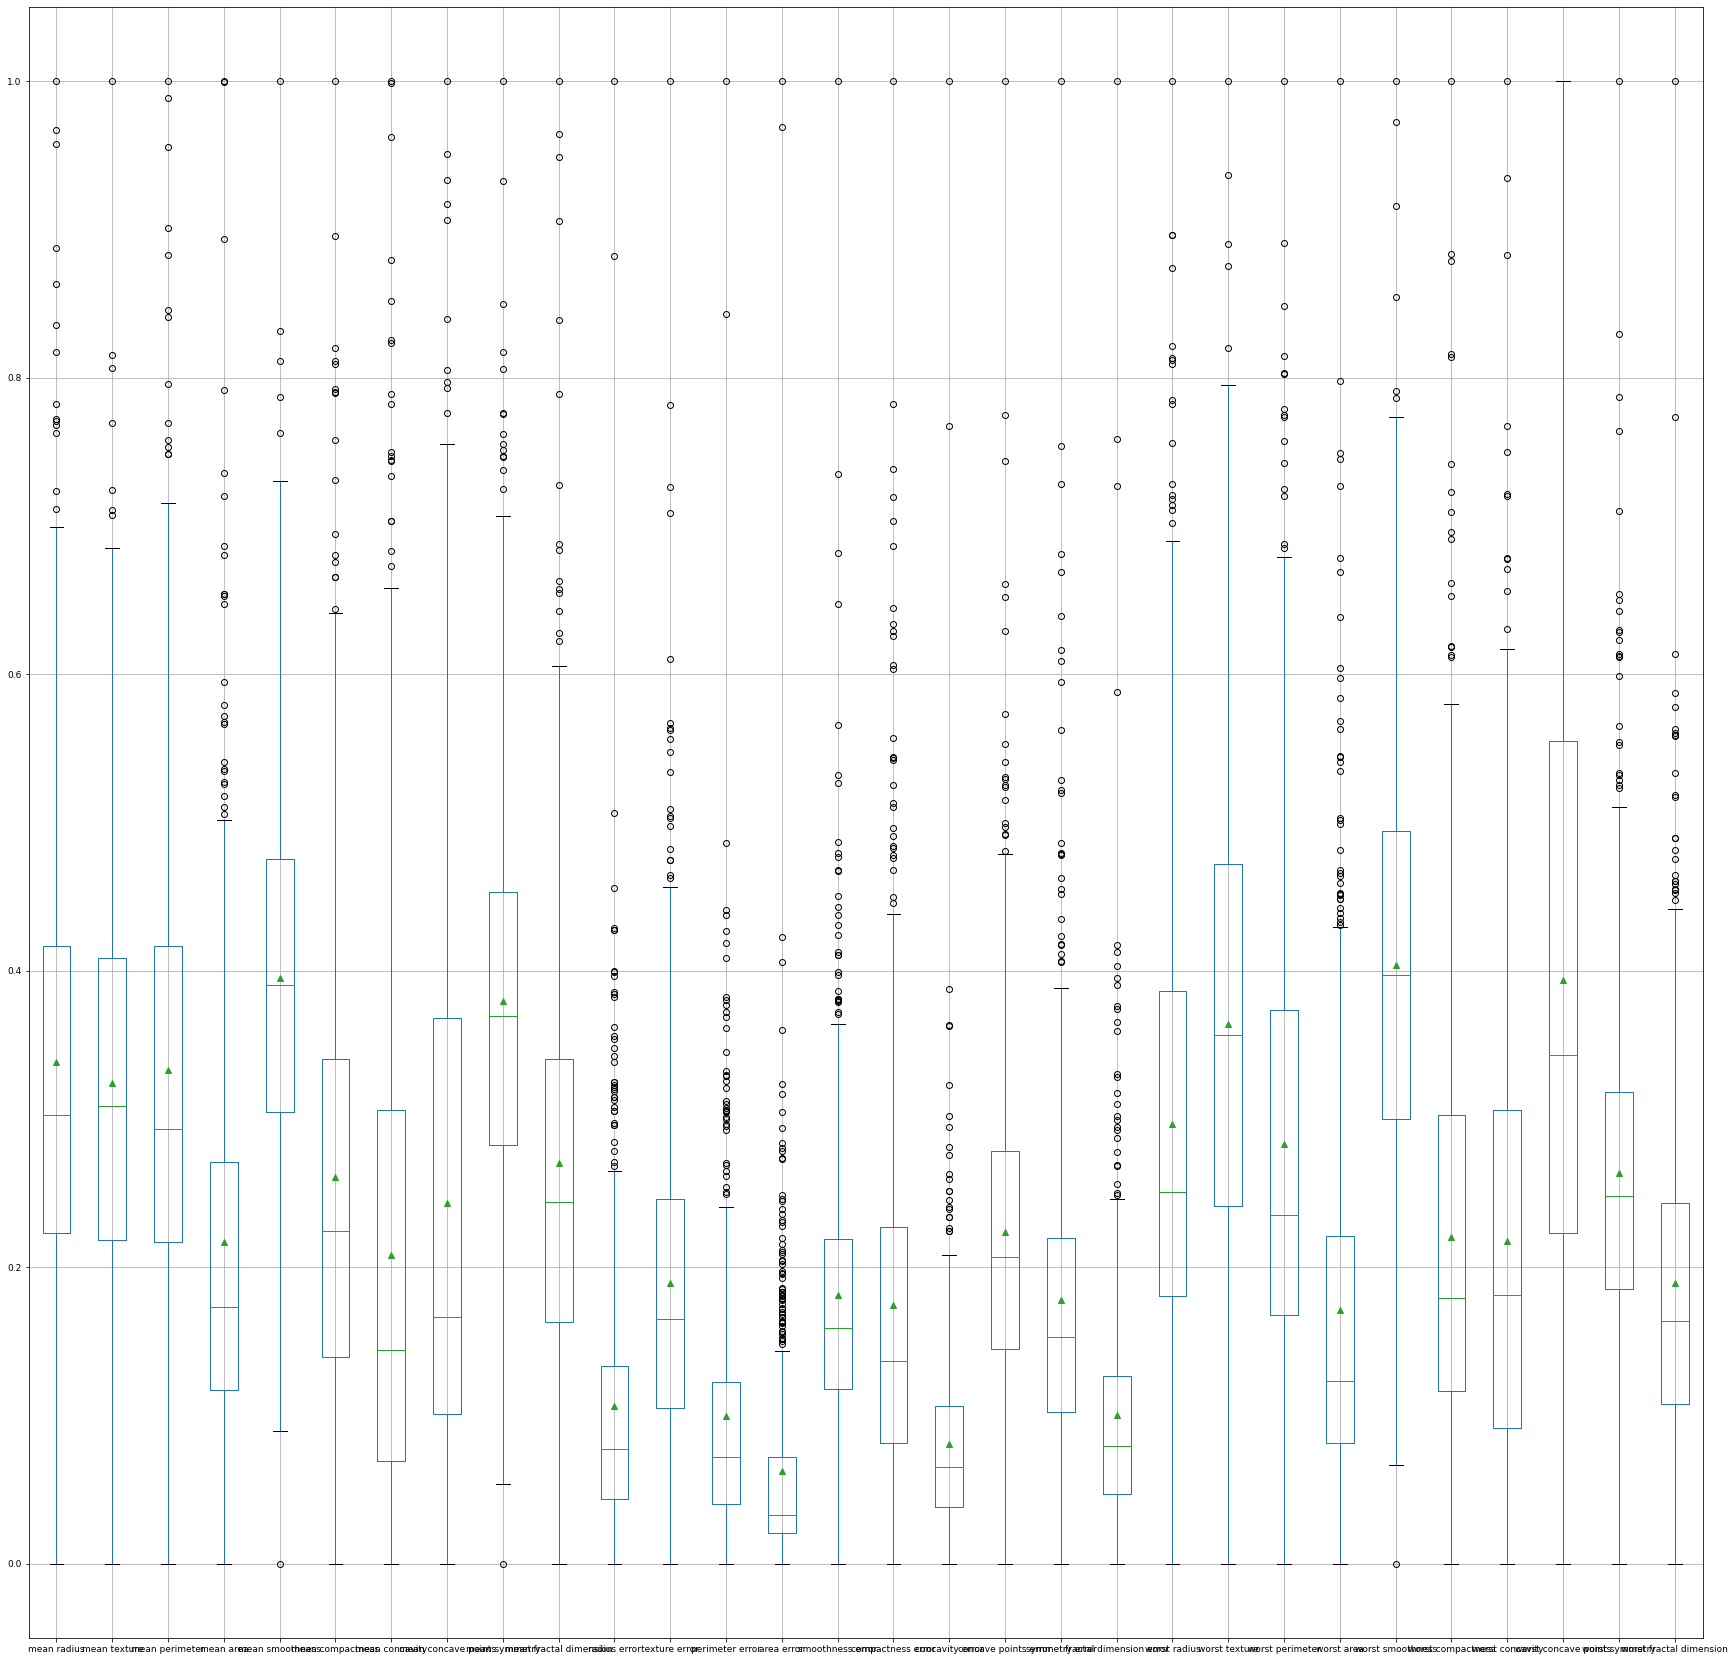

In [73]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X,y = myutils.get_X_y(df_cancer)
X_trans = trans.fit_transform(X)
df_cancer_trans = pd.DataFrame(data=X_trans, columns = df_cancer.columns[:-1])
ax = df_cancer_trans.boxplot(fontsize=9, showmeans=True, figsize=(30,30))

>> <font color='blus'>2.2 For each column, outliers can be considered as those values beyond 1% centile

In [74]:
dict_col_outlier = dict()
for col in df_cancer_trans.columns:
    centil = df_cancer_trans[col].quantile(0.99)
    df_cancer_trans = df_cancer_trans[df_cancer_trans[col]<centil]

>> <font color='blus'>2.3 Display rows and columns

In [75]:
print(df_cancer_trans.shape)

(406, 30)


>> <font color='blus'>2.4 Display boxplot with new dataframe

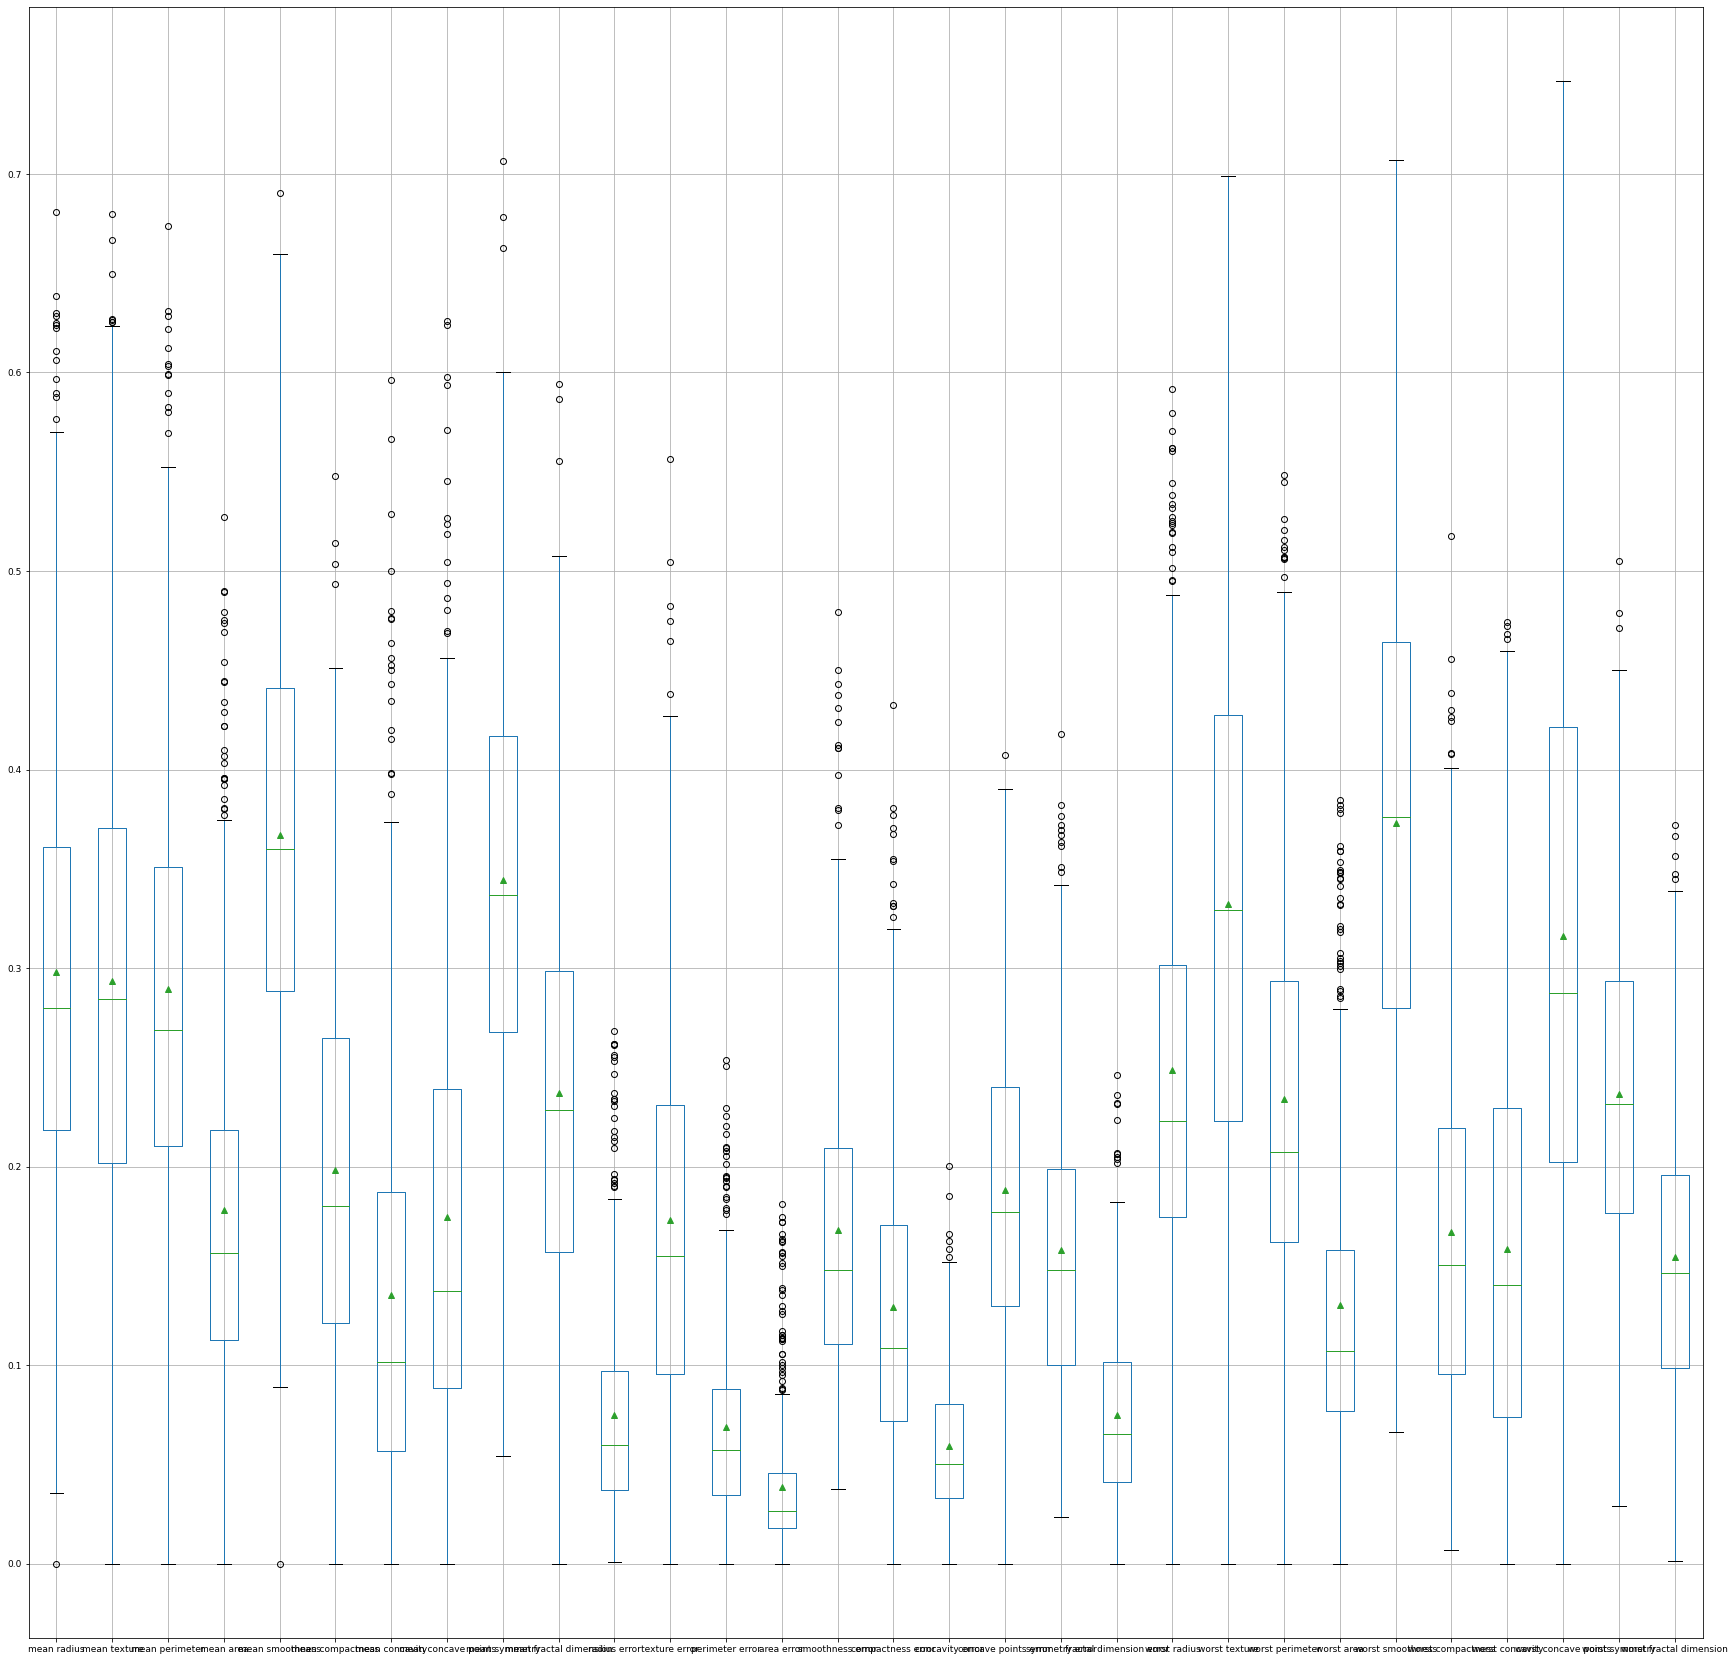

In [76]:
ax = df_cancer_trans.boxplot(fontsize=9, showmeans=True, figsize=(30,30))

> <font color='blus'>3 Lasso regularization

>> <font color='blus'>3.1 Add column target to transformed dataset

In [77]:
df_target_trans = pd.DataFrame()
for index in df_cancer_trans.index:
    df_target_trans.loc[index, 'target'] = df_cancer.loc[index,'target']
df_target_trans.shape

(406, 1)

In [78]:
df_cancer_trans = pd.concat([df_cancer_trans, df_target_trans], axis=1)

>> <font color='blus'>3.2 For `target` column : turn `malignant` to 1, `begnin` to 0

In [79]:
df_cancer_trans['target'].unique()

array(['malignant', 'benign'], dtype=object)

In [80]:
df_cancer_trans['target'] = df_cancer_trans['target'].apply(lambda val: 1 if val== 'malignant' else 0)

In [81]:
df_cancer_trans['target'].unique()

array([1, 0])

> <font color='blus'>3.3 Logistic regression with `Lasso` regularization

In [82]:
X_trans = df_cancer_trans[df_cancer_trans.columns[:-1]].values
y_trans = df_cancer_trans.target.values
X_trans.shape, y_trans.shape

((406, 30), (406,))

In [83]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
X_trans, y_trans, stratify=y_trans, random_state=42)

In [84]:
lasso.coef_.T.min(),lasso.coef_.T.max()

(-27.051138740840326, 148.10294386671856)

In [85]:
X_train.shape

(304, 30)

logreg0.01 : Training set score: 0.770
logreg0.01 : Test set score: 0.775

logreg1.0 : Training set score: 0.974
logreg1.0 : Test set score: 0.951

logreg1000 : Training set score: 1.000
logreg1000 : Test set score: 0.971



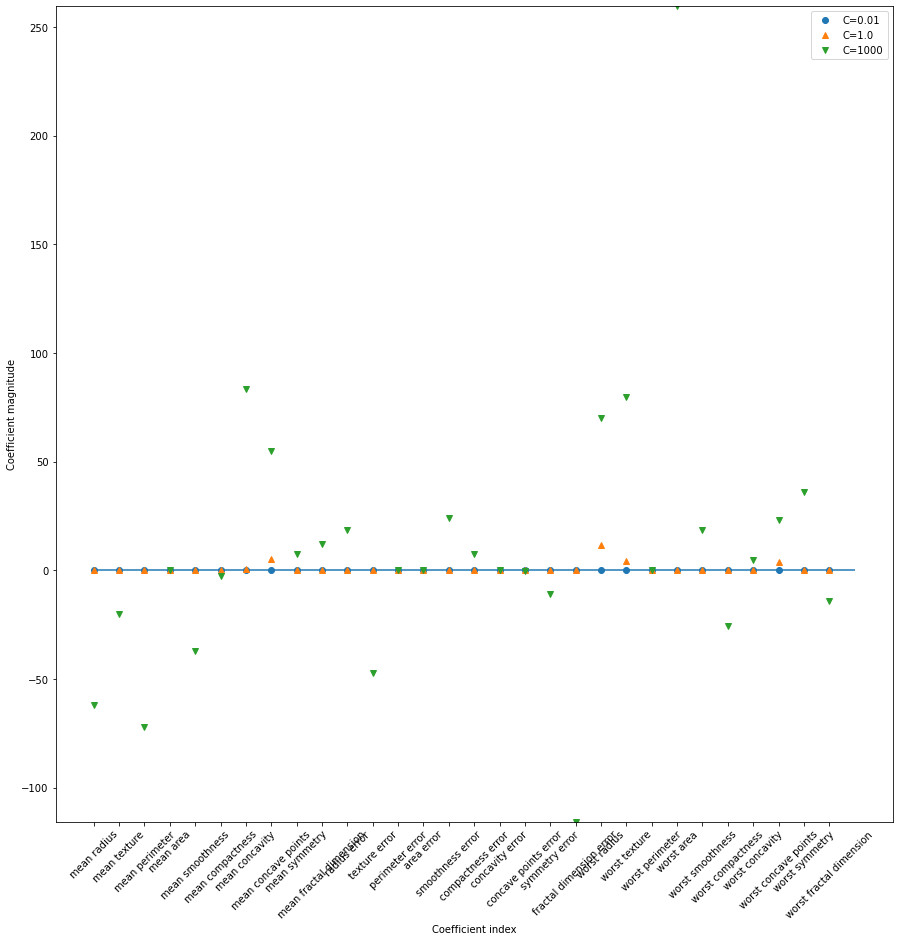

In [86]:
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
X_trans, y_trans, stratify=y_trans, random_state=42)


plt.subplots(figsize=(15, 15))
for C, marker in zip([0.01, 1., 1000], ['o','^','v']) :
    logreg  = LogisticRegression(max_iter=5000
                                 , C=C
                                 , penalty="l1"
                                 , solver='liblinear'
                                ).fit(X_train, y_train)

    print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
    print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
    print()

    plt.plot(logreg.coef_.T, marker, label="C="+str(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=45)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(logreg.coef_.T.min(), logreg.coef_.T.max())
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
_=plt.legend()

In [87]:
def explore_logistic_regression(  X
                                , y
                                , feature_names
                                , list_param
                                , transformer
                                , list_marker=['o','^','v']
                                , figsize=(15,15)
                                , penalty="l2"
                                , threshold=0.
                               ):
    '''This function explore logistic regression 
    implemented into sklearn.linear_model.LogisticRegression
    Input : 
        X: features values
        y: target values
        list_param: list of hyper-parameters for regularization.
                     This list length has to be the same then list_marker
        transformer: instance of class in package sklearn.preprocessing
        list_marker: markers used to display coefficients magnitude
                     This list length has to be the same then list_param
        figsize: (width, height) for figures to be displayes
        penalty: regularization parameter, same as for LogisticRegression
        threshold: value used to select the most important features.
    '''
    pass

## <font color='blus'>Exercice : Lasso

logreg0.01 : Training set score: 0.925
logreg0.01 : Test set score: 0.909

logreg1.0 : Training set score: 0.988
logreg1.0 : Test set score: 0.993

logreg1000 : Training set score: 1.000
logreg1000 : Test set score: 0.944



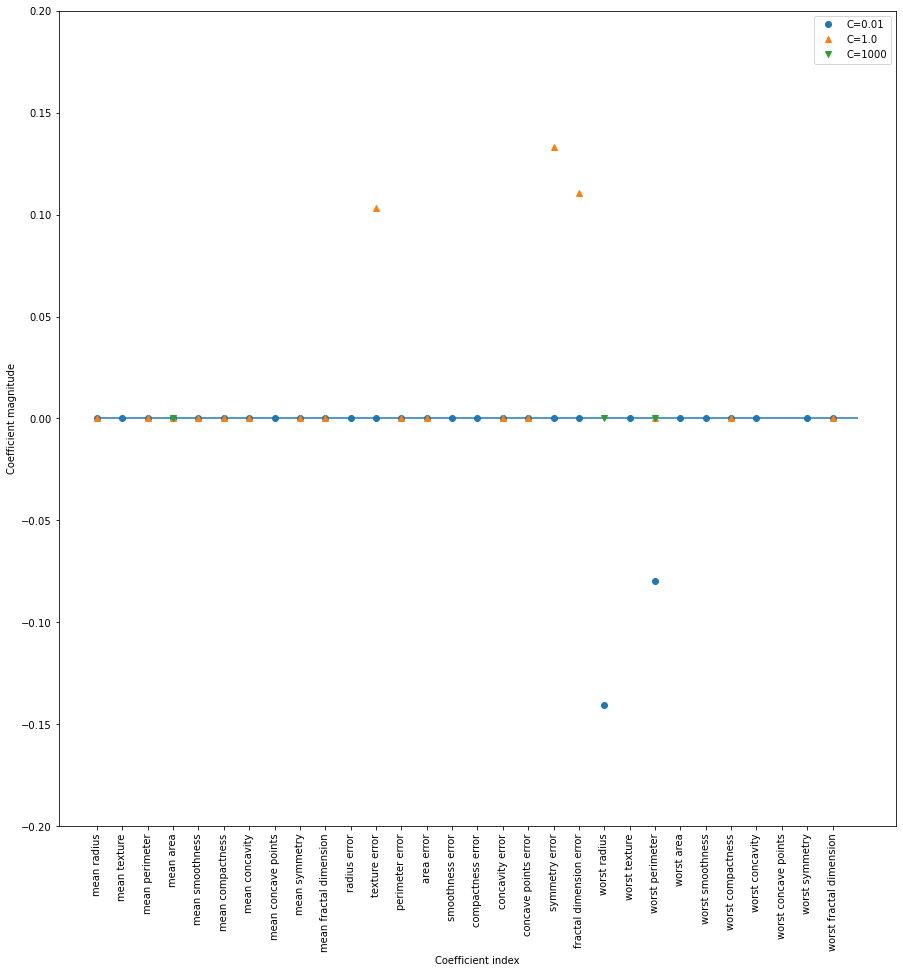

In [88]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_trans = trans.fit_transform(cancer.data)
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
X_trans, cancer.target, stratify=cancer.target, random_state=42)


plt.subplots(figsize=(15, 15))
for C, marker in zip([0.01, 1., 1000], ['o','^','v']) :
    logreg  = LogisticRegression(max_iter=5000
                                 , C=C
                                 , penalty="l1"
                                 , solver='liblinear'
                                ).fit(X_train, y_train)

    print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
    print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
    print()

    plt.plot(logreg.coef_.T, marker, label="C="+str(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-0.2, 0.2)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
_=plt.legend()

In [89]:
threshold = 1.
df_coeff = pd.DataFrame(data=logreg.coef_, columns=cancer.feature_names)
filter_coeff = np.abs(df_coeff.values.ravel()>threshold)
filter_coeff
df_coeff_sorted = df_coeff.T[filter_coeff].rename(columns={0:'coefficients'}).sort_values(by='coefficients', ascending=False)
display(df_coeff_sorted)

,coefficients
mean compactness,50.150270
concavity error,23.922213
perimeter error,21.803251
mean radius,16.140672
symmetry error,12.468500
worst fractal dimension,9.285021
mean perimeter,4.747516
worst smoothness,1.491077
smoothness error,1.425856


## <font color='blus'>Exercice : Elasticnet

logreg0.01 : Training set score: 0.988
logreg0.01 : Test set score: 0.986

logreg0.1 : Training set score: 0.988
logreg0.1 : Test set score: 0.986

logreg0.9 : Training set score: 0.988
logreg0.9 : Test set score: 0.986



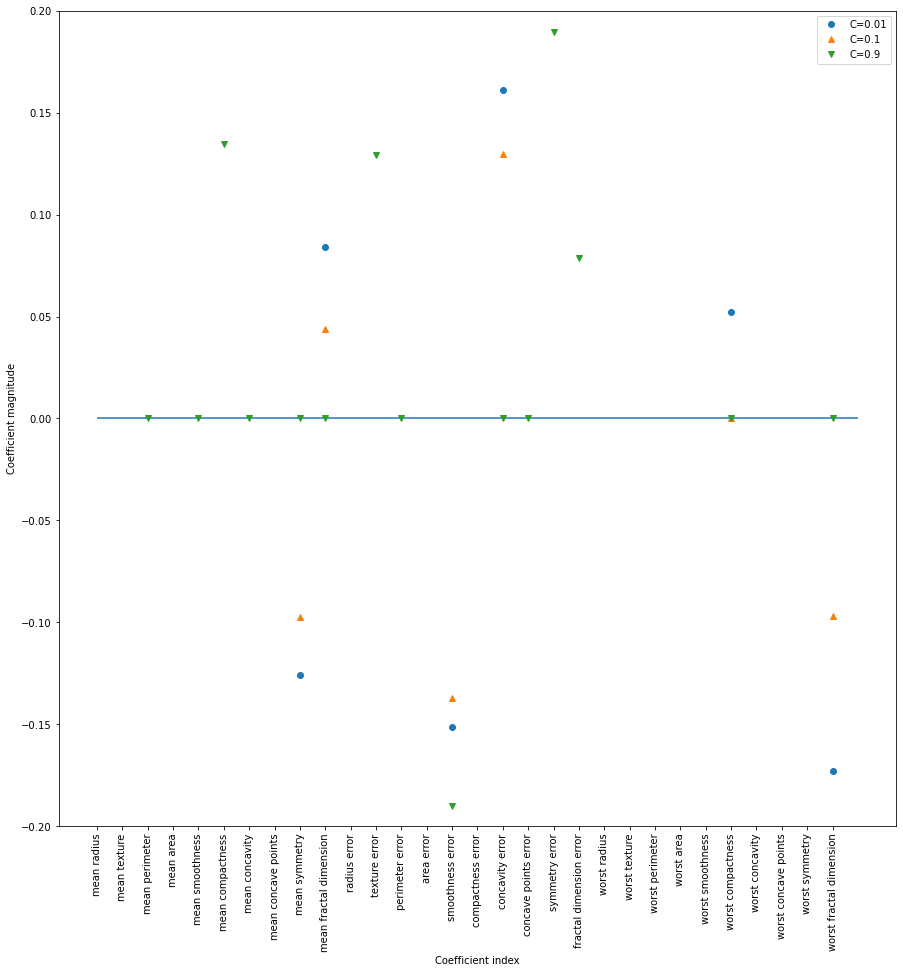

In [90]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_trans = trans.fit_transform(cancer.data)
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
X_trans, cancer.target, stratify=cancer.target, random_state=42)


plt.subplots(figsize=(15, 15))
for C, marker in zip([0.01, 0.1, 0.9], ['o','^','v']) :
    logreg  = LogisticRegression(max_iter=5000
                                 , l1_ratio=C
                                 , penalty="elasticnet"
                                 , solver='saga'
                                ).fit(X_train, y_train)

    print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
    print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
    print()

    plt.plot(logreg.coef_.T, marker, label="C="+str(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-0.2, 0.2)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
_=plt.legend()

In [91]:
threshold = 0.
df_coeff = pd.DataFrame(data=logreg.coef_, columns=cancer.feature_names)
filter_coeff = np.abs(df_coeff.values.ravel()>threshold)
filter_coeff
df_coeff_sorted = df_coeff.T[filter_coeff].rename(columns={0:'coefficients'}).sort_values(by='coefficients', ascending=False)
display(df_coeff_sorted)

,coefficients
compactness error,0.676276
symmetry error,0.189509
mean compactness,0.134573
texture error,0.129450
fractal dimension error,0.078881


## <font color='blus'>Exercice : Logistic regression explorer

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def explore_logistic_regression(  X
                                , y
                                , feature_names
                                , list_param
                                , transformer
                                , list_marker=['o','^','v']
                                , figsize=(15,15)
                                , penalty="l2"
                                , threshold=0.
                               ) :
    X_trans = transformer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
    X_trans, y, stratify=y, random_state=42)
    plt.subplots(figsize=figsize)

    if penalty == 'elasticnet' :
        for C, marker in zip(list_param, list_marker):
            logreg  = LogisticRegression(max_iter=5000
                                         , l1_ratio=C
                                         , penalty="elasticnet"
                                         , solver='saga'
                                        ).fit(X_train, y_train)

            print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
            print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
            print()

            plt.plot(logreg.coef_.T, marker, label="C="+str(C))
    else :
        for C, marker in zip(list_param, list_marker):
            logreg  = LogisticRegression(max_iter=5000
                                         , C=C
                                         , penalty=penalty
                                         , solver='liblinear'
                                        ).fit(X_train, y_train)

            print("logreg{} : Training set score: {:.3f}".format(C,logreg.score(X_train, y_train)))
            print("logreg{} : Test set score: {:.3f}".format(C,logreg.score(X_test, y_test)))
            print()

            plt.plot(logreg.coef_.T, marker, label="C="+str(C))
        
    plt.xticks(range(X.shape[1]), feature_names, rotation=90)
    plt.hlines(0, 0, X.shape[1])
    ylim_min = logreg.coef_.ravel().min()-0.1
    ylim_max = logreg.coef_.ravel().max()+0.1
    plt.ylim(ylim_min, ylim_max)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    _=plt.legend()

    df_coeff = pd.DataFrame(data=logreg.coef_, columns=feature_names)
    filter_coeff = np.abs(df_coeff.values.ravel()>threshold)
    df_coeff_sorted = df_coeff.T[filter_coeff].rename(columns={0:'coefficients'}).sort_values(by='coefficients', ascending=False)
    display(df_coeff_sorted)

logreg0.01 : Training set score: 0.974
logreg0.01 : Test set score: 0.958

logreg0.1 : Training set score: 0.986
logreg0.1 : Test set score: 0.986

logreg1.0 : Training set score: 0.988
logreg1.0 : Test set score: 0.986



,coefficients
mean compactness,0.707416
compactness error,0.586454
symmetry error,0.416692
fractal dimension error,0.351498
texture error,0.248530
concavity error,0.181627
mean fractal dimension,0.065103
worst compactness,0.062820


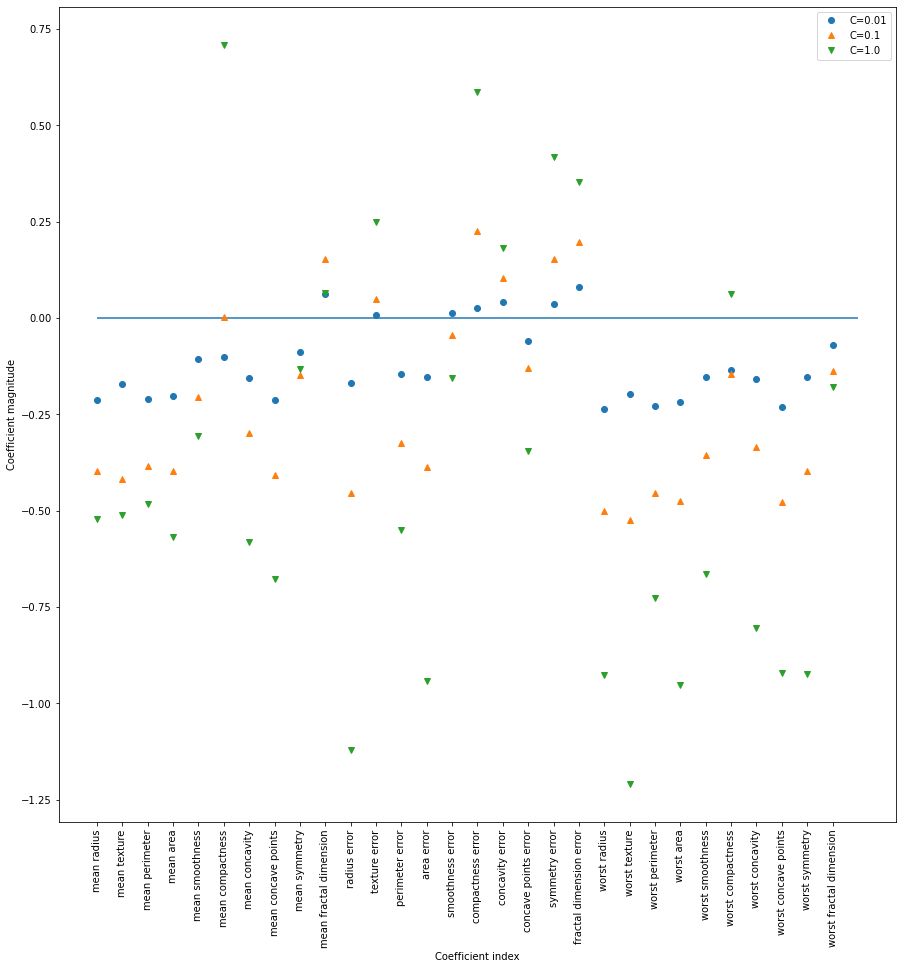

In [93]:
cancer = load_breast_cancer()
transformer = StandardScaler()
list_param = [0.01, 0.1, 1.]
explore_logistic_regression(cancer.data
                                , cancer.target
                                , cancer.feature_names
                                , list_param
                                , transformer
                                , list_marker=['o','^','v']
                                , figsize=(15,15)
                                , penalty="l2"
                               )

logreg0.01 : Training set score: 0.925
logreg0.01 : Test set score: 0.909

logreg1.0 : Training set score: 0.988
logreg1.0 : Test set score: 0.993

logreg100.0 : Training set score: 1.000
logreg100.0 : Test set score: 0.944



,coefficients
mean compactness,36.539602
concavity error,17.858819
perimeter error,14.317260
mean radius,10.796236
symmetry error,8.645543
worst fractal dimension,7.165825
worst smoothness,1.276311
smoothness error,0.457210


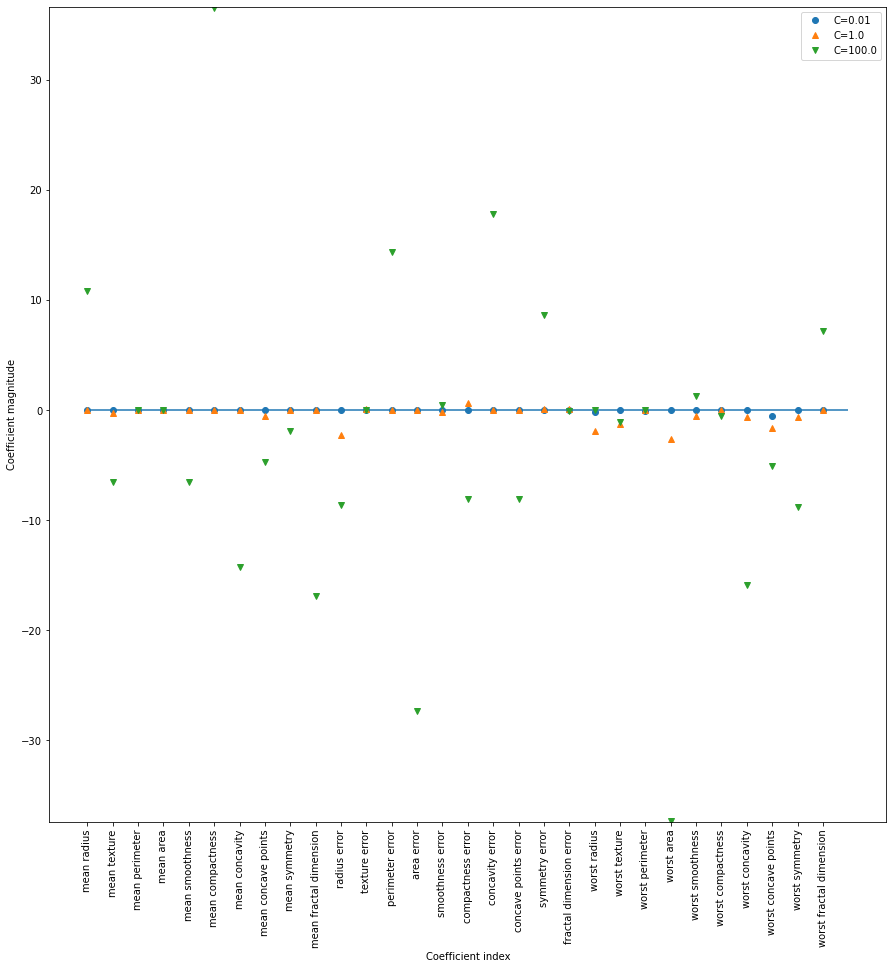

In [94]:
cancer = load_breast_cancer()
list_param = [0.01, 1., 100.]
transformer = StandardScaler()
explore_logistic_regression(cancer.data
                                , cancer.target
                                , cancer.feature_names
                                , list_param
                                , transformer
                                , list_marker=['o','^','v']
                                , figsize=(15,15)
                                , penalty="l1"
                               )

logreg0.01 : Training set score: 0.988
logreg0.01 : Test set score: 0.986

logreg0.1 : Training set score: 0.988
logreg0.1 : Test set score: 0.986

logreg1.0 : Training set score: 0.988
logreg1.0 : Test set score: 0.993



,coefficients
compactness error,0.681514
texture error,0.138931
symmetry error,0.132830
fractal dimension error,0.099384


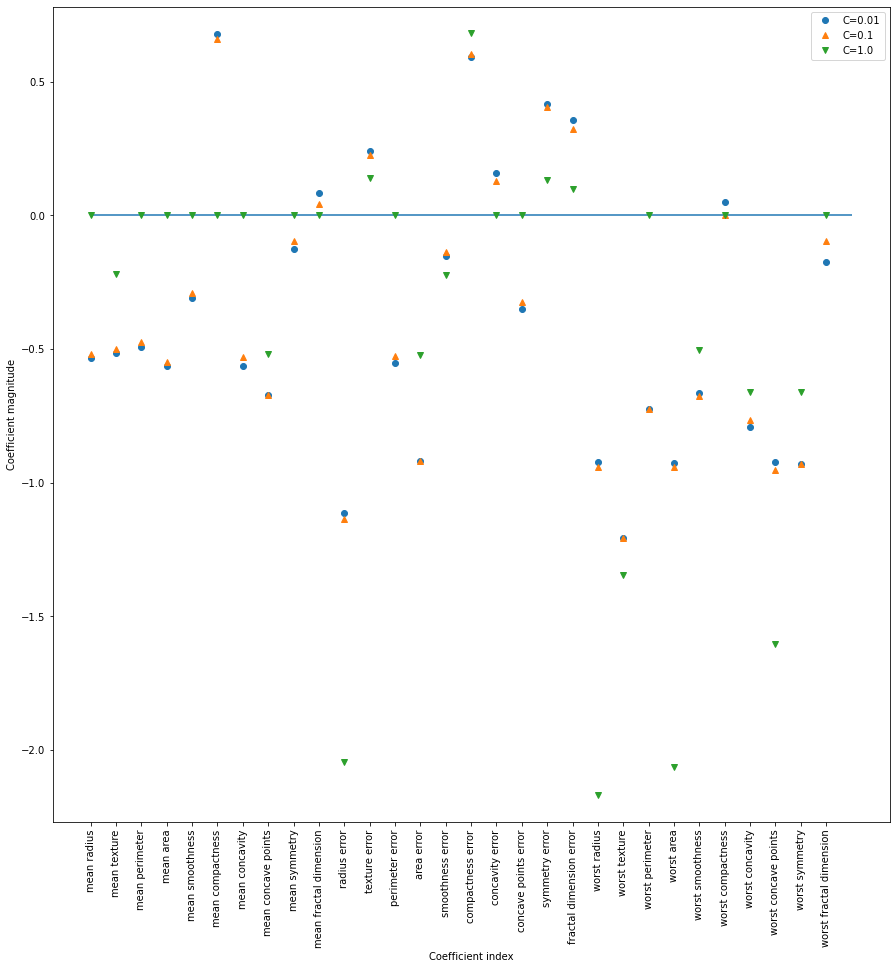

In [95]:
cancer = load_breast_cancer()
list_param = [0.01, 0.1, 1.]
transformer = StandardScaler()
explore_logistic_regression(cancer.data
                                , cancer.target
                                , cancer.feature_names
                                , list_param
                                , transformer
                                , list_marker=['o','^','v']
                                , figsize=(15,15)
                                , penalty="elasticnet"
                               )

### Quizz

> How these three models perform? Do they underfit or overfit?

# <font color='blus'>Exercice#2

> Implement Gaussian Naive Bayse algorithm as a class : `MyGaussianNaiveBayse`
>> 1. `__init__` method
>> 2. `fit` method
>> 3. `predict` method
>> 4. `score` method
>
> Use `df_X` dataset here under to test this implementation

> Dataset

In [250]:
mu=0.
sigma=1.
X1 = np.random.normal(mu, sigma, 50)
X2 = np.random.normal(mu, sigma, 50)
df_y1 = pd.DataFrame(data=np.array([X1, X2]).T, columns=['X1','X2'])
df_y1['y'] = 1.

mu=5.
sigma=1.
X1 = np.random.normal(mu, sigma, 50)
X2 = np.random.normal(mu, sigma, 50)

df_y2 = pd.DataFrame(data=np.array([X1, X2]).T, columns=['X1','X2'])
df_y2['y'] = 0.

df_X= pd.concat([df_y1, df_y2], axis=0, ignore_index=True)

In [275]:
import numpy as np

class MyGaussianNaiveBayse :
    #------------------------------------------------------------------------------
    #
    #------------------------------------------------------------------------------
    def __init__(self):
        #--------------------------------------------------------------------------
        # Store all conditional probabilities for any feature values, 
        # this, given target values
        #--------------------------------------------------------------------------
        self.dict_condprob_feature = dict()
        
        #--------------------------------------------------------------------------
        # Store all prior knowledge, P(Y)
        #--------------------------------------------------------------------------
        self.dict_prob_target = dict()
        
        #--------------------------------------------------------------------------
        # Store the list of feature names
        #--------------------------------------------------------------------------
        self.list_feature_name = list()
        
        #--------------------------------------------------------------------------
        # Store the target name
        #--------------------------------------------------------------------------
        self.target_name = str()
    #------------------------------------------------------------------------------
        

    #------------------------------------------------------------------------------
    #
    #------------------------------------------------------------------------------
    def _pdf_function(self, val, mu, std):
        '''Calculate and returns probabiloity from x, mean (mu) and standard deviation (std)
        x is supposed to belong a Gaussian distribution.
        '''
        pdf = np.exp((-(val-mu)**2)/(2*std**2))
        pdf = pdf/(std*np.sqrt(2*np.pi))
        return pdf
    #------------------------------------------------------------------------------
            
    #------------------------------------------------------------------------------
    #
    #------------------------------------------------------------------------------
    def fit(self, df_X):
        '''Train Naive Bayse model.
        Using probability density function, calculate conditional probabilities 
        or any feature values, given y values.
        Input:
            * df_X: panas dataframe containing 2 features, X1 and X2 and the target, y.
        '''
        #--------------------------------------------------------------------------
        # Get features name as a list using a comprehension of list
        # Get all columns, except the last one, that is the target.
        #--------------------------------------------------------------------------
        self.list_feature_name = [feature_name for feature_name in df_X.columns[:-1]]
        
        #--------------------------------------------------------------------------
        # Get y values; this is the last column
        #--------------------------------------------------------------------------
        self.target_name = df_X.columns[-1]
        arr_yvalue = df_X[self.target_name].unique()
        
        #--------------------------------------------------------------------------
        #Store conditional probabilities P(X_value|y_value)
        #--------------------------------------------------------------------------
        for feature_name in self.list_feature_name:
            dict_condprob_yvalue=dict()
            for yvalue in arr_yvalue:
                df_filter = df_X[self.target_name]==yvalue
                feature_yvalue_mean = df_X[feature_name][df_filter].mean()
                feature_yvalue_std  = df_X[feature_name][df_filter].std()
                dict_condprob_yvalue[yvalue] = (feature_yvalue_mean, feature_yvalue_std)
            self.dict_condprob_feature[feature_name] = dict_condprob_yvalue
        
        #--------------------------------------------------------------------------
        # Store prior knowledge P(y) for any of y values 
        #--------------------------------------------------------------------------
        for yvalue in arr_yvalue: 
            df_filter = df_X[self.target_name]== yvalue
            #----------------------------------------------------------------------
            # shape[0] provides the number of rows in pandas dataframe
            #----------------------------------------------------------------------
            self.dict_prob_target[yvalue] = df_X[df_filter].shape[0]/df_X.shape[0]    
    #------------------------------------------------------------------------------
            
    #------------------------------------------------------------------------------
    #
    #------------------------------------------------------------------------------
    def predict(self, X):
        '''Predicts the belonging of X into a class of y
        Probability density function is used in order to calculate conditional probabilities.
        
        INPUT
            * X : 1D array of features values.
        OUTPUT:
            * class X has been predicted to belong to.
        '''
        #--------------------------------------------------------------------------
        # Initialise the  pdf value
        #--------------------------------------------------------------------------
        dict_prob= dict()
        
        #--------------------------------------------------------------------------
        # For any y value, calculate: 
        # - P(X1|Y1)*P(X2|Y1)*...*P(Xn|Y1)*P(Y1)
        # - P(X1|Y2)*P(X2|Y2)*...*P(Xn|Y2)*P(Y2)
        # .
        # .
        # .
        # - P(X1|Yk)*P(X2|Yk)*...*P(Xn|Yk)*P(Yk)
        #
        # Each of the calculation is stored into dict_prob[Yi] for Yi in [Y1,...,Yk]
        #--------------------------------------------------------------------------
        for y, prob_y in self.dict_prob_target.items():
            pdfxy = prob_y
            for x, feature_name in zip(X, self.list_feature_name):
                dict_condprob_yvalue = self.dict_condprob_feature[feature_name]
                mu, std = dict_condprob_yvalue[y]
                pdfxy *= self._pdf_function(x, mu, std)
            dict_prob[y]=pdfxy
        
        #--------------------------------------------------------------------------
        # Get the max value from this dictionary; the result prediction will be the 
        # key for this max value.
        #--------------------------------------------------------------------------
        dict_inv_prob = {value:key for key, value in dict_prob.items()}

        max_value_key = max(dict_inv_prob.keys())
        return dict_inv_prob[max_value_key]
    #------------------------------------------------------------------------------
            
    #------------------------------------------------------------------------------
    #
    #------------------------------------------------------------------------------
    def score(self, df):
        '''Returns the percentage of True predictions.
        '''
        ser_pred = pd.Series(dtype=float)
        #--------------------------------------------------------------------------
        # Make predictions over all dataset points
        #--------------------------------------------------------------------------
        for ind, X in zip(df.index, df.values) :
            y = df.loc[ind, self.target_name]
            X1, X2 = X[0], X[1]
            y_pred = self.predict([X1,X2])
            
            #----------------------------------------------------------------------
            # Store predictions result as a boolean
            #----------------------------------------------------------------------
            ser_pred.loc[ind] = y_pred == y
            
        #--------------------------------------------------------------------------
        # Count occurences of True predictions divided by total elements. 
        #--------------------------------------------------------------------------
        return len(ser_pred.values==True)/len(ser_pred)*100
    #------------------------------------------------------------------------------

In [276]:
oMyGaussianNaiveBayse = MyGaussianNaiveBayse()
oMyGaussianNaiveBayse.fit(df_X)

> Randomly select a sample and make a prediction

In [277]:
arr = df_X.sample().values[0]
X1, X2, y = arr[0],arr[1], arr[2]
print("(X1,X2)=({},{}), Class={}\n".format(X1, X2, y))
print("Predict= {} True={}".format(oMyGaussianNaiveBayse.predict([X1,X2]),y))

(X1,X2)=(-0.04021416464919285,0.9756108350443404), Class=1.0

Predict= 1 True=1.0


> Score the dataset

In [278]:
score = oMyGaussianNaiveBayse.score(df_X)
print("Scoring dataset: {}%".format(score))

Scoring dataset: 100.0%
